In [1]:
import numpy as np
import pandas as pd


In [2]:
#loading the particular dataset as a dataframe for our model to be worked upon
df1 = pd.read_csv("1805307.csv")
df1

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200920735,ALBERT foundation,2020-04-10 00:00:00,2020.0,1.930479e+09,2020-02-05,20200205,20200205,20200410.0,USD,RV,1.0,NaN,15369.66,20200205.0,NAGD,1.930479e+09,0
1,U001,0200777735,NASH systems,2019-12-10 00:00:00,2019.0,1.930192e+09,2019-11-26,20191126,20191126,20191211.0,USD,RV,1.0,NaN,6594.04,20191126.0,NAA8,1.930192e+09,0
2,U001,0200769623,WAL-MAR corporation,2019-04-02 00:00:00,2019.0,1.928997e+09,2019-03-22,20190320,20190322,20190406.0,USD,RV,1.0,NaN,2332.49,20190322.0,NAH4,1.928997e+09,0
3,U001,0200799367,MCL systems,2019-08-28 00:00:00,2019.0,1.929735e+09,2019-08-13,20190812,20190813,20190828.0,USD,RV,1.0,NaN,93803.71,20190813.0,NAA8,1.929735e+09,0
4,U001,0200759878,SA foundation,2020-01-16 00:00:00,2020.0,1.930332e+09,2019-12-31,20191228,20191231,20200115.0,USD,RV,1.0,NaN,30887.57,20191231.0,NAH4,1.930332e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200762301,C&S WH us,NaN,2020.0,1.930817e+09,2020-04-23,20200422,20200423,20200508.0,USD,RV,1.0,NaN,63086.47,20200423.0,NAC6,1.930817e+09,1
49996,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930645e+09,2020-03-13,20200312,20200313,20200328.0,USD,RV,1.0,NaN,1898.20,20200313.0,NAH4,1.930645e+09,1
49997,U001,0200037027,FARN co,NaN,2020.0,1.930660e+09,2020-03-17,20200317,20200317,20200401.0,USD,RV,1.0,NaN,21151.18,20200317.0,NAA8,1.930660e+09,1
49998,U001,0200762301,C&S WH associates,NaN,2020.0,1.930847e+09,2020-05-03,20200502,20200503,20200518.0,USD,RV,1.0,NaN,3228.79,20200503.0,NAC6,1.930847e+09,1


In [3]:
#checking out the columns having a certain number of unique values
df1.nunique()

business_code                 6
cust_number                1446
name_customer              4377
clear_date                  403
buisness_year                 2
doc_id                    50000
posting_date                501
document_create_date        505
document_create_date.1      501
due_in_date                 538
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         45161
baseline_create_date        501
cust_payment_terms           72
invoice_id                49995
isOpen                        2
dtype: int64

In [4]:
#checking whether there are any duplicate columns in the dataset 
df1.duplicated().sum()

0

In [5]:
#checking which columns have how many null values
df1.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                 3902
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    5
isOpen                        0
dtype: int64

In [6]:
#dropping off those columns which have all there values as null
df1.dropna(how="all",axis=1,inplace=True)
df1

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200920735,ALBERT foundation,2020-04-10 00:00:00,2020.0,1.930479e+09,2020-02-05,20200205,20200205,20200410.0,USD,RV,1.0,15369.66,20200205.0,NAGD,1.930479e+09,0
1,U001,0200777735,NASH systems,2019-12-10 00:00:00,2019.0,1.930192e+09,2019-11-26,20191126,20191126,20191211.0,USD,RV,1.0,6594.04,20191126.0,NAA8,1.930192e+09,0
2,U001,0200769623,WAL-MAR corporation,2019-04-02 00:00:00,2019.0,1.928997e+09,2019-03-22,20190320,20190322,20190406.0,USD,RV,1.0,2332.49,20190322.0,NAH4,1.928997e+09,0
3,U001,0200799367,MCL systems,2019-08-28 00:00:00,2019.0,1.929735e+09,2019-08-13,20190812,20190813,20190828.0,USD,RV,1.0,93803.71,20190813.0,NAA8,1.929735e+09,0
4,U001,0200759878,SA foundation,2020-01-16 00:00:00,2020.0,1.930332e+09,2019-12-31,20191228,20191231,20200115.0,USD,RV,1.0,30887.57,20191231.0,NAH4,1.930332e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200762301,C&S WH us,NaN,2020.0,1.930817e+09,2020-04-23,20200422,20200423,20200508.0,USD,RV,1.0,63086.47,20200423.0,NAC6,1.930817e+09,1
49996,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930645e+09,2020-03-13,20200312,20200313,20200328.0,USD,RV,1.0,1898.20,20200313.0,NAH4,1.930645e+09,1
49997,U001,0200037027,FARN co,NaN,2020.0,1.930660e+09,2020-03-17,20200317,20200317,20200401.0,USD,RV,1.0,21151.18,20200317.0,NAA8,1.930660e+09,1
49998,U001,0200762301,C&S WH associates,NaN,2020.0,1.930847e+09,2020-05-03,20200502,20200503,20200518.0,USD,RV,1.0,3228.79,20200503.0,NAC6,1.930847e+09,1


In [7]:
#segregrating those rows whic have clear_date as null
Test_data = df1[df1['clear_date'].isnull()]
Test_data.reset_index()
Test_data


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
46098,U001,200729290,KROGER,NaN,2020.0,1.930687e+09,2020-03-22,20200323,20200322,20200406.0,USD,RV,1.0,108240.91,20200322.0,NAA8,1.930687e+09,1
46099,U001,0200769623,WAL-MAR,NaN,2020.0,1.930851e+09,2020-05-03,20200502,20200503,20200518.0,USD,RV,1.0,43602.81,20200503.0,NAH4,1.930851e+09,1
46100,U001,0200936373,SUPE llc,NaN,2020.0,1.930798e+09,2020-04-20,20200417,20200420,20200505.0,USD,RV,1.0,8011.12,20200420.0,NAA8,1.930798e+09,1
46101,CA02,0100021489,CHENS E associates,NaN,2020.0,2.960618e+09,2020-03-02,20200302,20200302,20200314.0,CAD,RV,1.0,21479.58,20200304.0,CA10,2.960618e+09,1
46102,U001,0100044041,DEF. F corporation,NaN,2020.0,1.930599e+09,2020-03-04,20200304,20200304,20200324.0,USD,RV,1.0,2534.27,20200301.0,NAM4,1.930599e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200762301,C&S WH us,NaN,2020.0,1.930817e+09,2020-04-23,20200422,20200423,20200508.0,USD,RV,1.0,63086.47,20200423.0,NAC6,1.930817e+09,1
49996,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930645e+09,2020-03-13,20200312,20200313,20200328.0,USD,RV,1.0,1898.20,20200313.0,NAH4,1.930645e+09,1
49997,U001,0200037027,FARN co,NaN,2020.0,1.930660e+09,2020-03-17,20200317,20200317,20200401.0,USD,RV,1.0,21151.18,20200317.0,NAA8,1.930660e+09,1
49998,U001,0200762301,C&S WH associates,NaN,2020.0,1.930847e+09,2020-05-03,20200502,20200503,20200518.0,USD,RV,1.0,3228.79,20200503.0,NAC6,1.930847e+09,1


In [8]:
#seperating those rows where the clear_date has not null values
Train_data = df1[df1['clear_date'].notnull()]
Train_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200920735,ALBERT foundation,2020-04-10 00:00:00,2020.0,1.930479e+09,2020-02-05,20200205,20200205,20200410.0,USD,RV,1.0,15369.66,20200205.0,NAGD,1.930479e+09,0
1,U001,0200777735,NASH systems,2019-12-10 00:00:00,2019.0,1.930192e+09,2019-11-26,20191126,20191126,20191211.0,USD,RV,1.0,6594.04,20191126.0,NAA8,1.930192e+09,0
2,U001,0200769623,WAL-MAR corporation,2019-04-02 00:00:00,2019.0,1.928997e+09,2019-03-22,20190320,20190322,20190406.0,USD,RV,1.0,2332.49,20190322.0,NAH4,1.928997e+09,0
3,U001,0200799367,MCL systems,2019-08-28 00:00:00,2019.0,1.929735e+09,2019-08-13,20190812,20190813,20190828.0,USD,RV,1.0,93803.71,20190813.0,NAA8,1.929735e+09,0
4,U001,0200759878,SA foundation,2020-01-16 00:00:00,2020.0,1.930332e+09,2019-12-31,20191228,20191231,20200115.0,USD,RV,1.0,30887.57,20191231.0,NAH4,1.930332e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46093,U001,0200769623,WAL-MAR corporation,2020-02-18 00:00:00,2020.0,1.930464e+09,2020-02-02,20200201,20200202,20200217.0,USD,RV,1.0,8261.60,20200202.0,NAH4,1.930464e+09,0
46094,U001,0200769623,WAL-MAR foundation,2019-02-21 00:00:00,2019.0,1.928777e+09,2019-02-11,20190210,20190211,20190226.0,USD,RV,1.0,59017.79,20190211.0,NAH4,1.928777e+09,0
46095,U001,0200149567,RESER,2019-06-07 00:00:00,2019.0,1.929210e+09,2019-04-25,20190425,20190425,20190609.0,USD,RV,1.0,10140.00,20190425.0,NABG,1.929210e+09,0
46096,U001,0200353024,DECA us,2019-04-16 00:00:00,2019.0,1.929082e+09,2019-04-04,20190404,20190404,20190424.0,USD,RV,1.0,317.04,20190401.0,NAM4,1.929082e+09,0


In [9]:
#checking the columns which are constant by checking the number of uniques
[col for col in Train_data.columns if Train_data[col].nunique()==1]

['posting_id', 'isOpen']

In [10]:
#dropping the constant columns and storing in another dataframe without altering the previous dataframe
Train_data1 = Train_data.drop(labels=['posting_id', 'isOpen'],axis=1,inplace=False)
Train_data1

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,U001,200920735,ALBERT foundation,2020-04-10 00:00:00,2020.0,1.930479e+09,2020-02-05,20200205,20200205,20200410.0,USD,RV,15369.66,20200205.0,NAGD,1.930479e+09
1,U001,0200777735,NASH systems,2019-12-10 00:00:00,2019.0,1.930192e+09,2019-11-26,20191126,20191126,20191211.0,USD,RV,6594.04,20191126.0,NAA8,1.930192e+09
2,U001,0200769623,WAL-MAR corporation,2019-04-02 00:00:00,2019.0,1.928997e+09,2019-03-22,20190320,20190322,20190406.0,USD,RV,2332.49,20190322.0,NAH4,1.928997e+09
3,U001,0200799367,MCL systems,2019-08-28 00:00:00,2019.0,1.929735e+09,2019-08-13,20190812,20190813,20190828.0,USD,RV,93803.71,20190813.0,NAA8,1.929735e+09
4,U001,0200759878,SA foundation,2020-01-16 00:00:00,2020.0,1.930332e+09,2019-12-31,20191228,20191231,20200115.0,USD,RV,30887.57,20191231.0,NAH4,1.930332e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46093,U001,0200769623,WAL-MAR corporation,2020-02-18 00:00:00,2020.0,1.930464e+09,2020-02-02,20200201,20200202,20200217.0,USD,RV,8261.60,20200202.0,NAH4,1.930464e+09
46094,U001,0200769623,WAL-MAR foundation,2019-02-21 00:00:00,2019.0,1.928777e+09,2019-02-11,20190210,20190211,20190226.0,USD,RV,59017.79,20190211.0,NAH4,1.928777e+09
46095,U001,0200149567,RESER,2019-06-07 00:00:00,2019.0,1.929210e+09,2019-04-25,20190425,20190425,20190609.0,USD,RV,10140.00,20190425.0,NABG,1.929210e+09
46096,U001,0200353024,DECA us,2019-04-16 00:00:00,2019.0,1.929082e+09,2019-04-04,20190404,20190404,20190424.0,USD,RV,317.04,20190401.0,NAM4,1.929082e+09


In [11]:
Test_data.drop(labels=['posting_id', 'isOpen'],axis=1,inplace=True)
Test_data

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
46098,U001,200729290,KROGER,NaN,2020.0,1.930687e+09,2020-03-22,20200323,20200322,20200406.0,USD,RV,108240.91,20200322.0,NAA8,1.930687e+09
46099,U001,0200769623,WAL-MAR,NaN,2020.0,1.930851e+09,2020-05-03,20200502,20200503,20200518.0,USD,RV,43602.81,20200503.0,NAH4,1.930851e+09
46100,U001,0200936373,SUPE llc,NaN,2020.0,1.930798e+09,2020-04-20,20200417,20200420,20200505.0,USD,RV,8011.12,20200420.0,NAA8,1.930798e+09
46101,CA02,0100021489,CHENS E associates,NaN,2020.0,2.960618e+09,2020-03-02,20200302,20200302,20200314.0,CAD,RV,21479.58,20200304.0,CA10,2.960618e+09
46102,U001,0100044041,DEF. F corporation,NaN,2020.0,1.930599e+09,2020-03-04,20200304,20200304,20200324.0,USD,RV,2534.27,20200301.0,NAM4,1.930599e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200762301,C&S WH us,NaN,2020.0,1.930817e+09,2020-04-23,20200422,20200423,20200508.0,USD,RV,63086.47,20200423.0,NAC6,1.930817e+09
49996,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930645e+09,2020-03-13,20200312,20200313,20200328.0,USD,RV,1898.20,20200313.0,NAH4,1.930645e+09
49997,U001,0200037027,FARN co,NaN,2020.0,1.930660e+09,2020-03-17,20200317,20200317,20200401.0,USD,RV,21151.18,20200317.0,NAA8,1.930660e+09
49998,U001,0200762301,C&S WH associates,NaN,2020.0,1.930847e+09,2020-05-03,20200502,20200503,20200518.0,USD,RV,3228.79,20200503.0,NAC6,1.930847e+09


In [12]:
#checking the columns with null after the train and test split
Train_data1.isnull().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                5
dtype: int64

In [13]:
#checking the data types of the date columns
Train_data1.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
dtype: object

In [14]:
#to convert the document_create_date column to string type from integer type
Train_data1['document_create_date'] = Train_data1['document_create_date'].astype('str')
#and checking whether its has been implemented or not
Train_data1['document_create_date'].head()

0    20200205
1    20191126
2    20190320
3    20190812
4    20191228
Name: document_create_date, dtype: object

In [15]:
#converting the dates from their datatypes to datetime format

Train_data1['document_create_date'] = pd.to_datetime(Train_data1['document_create_date'])
Train_data1['document_create_date'].head() 

0   2020-02-05
1   2019-11-26
2   2019-03-20
3   2019-08-12
4   2019-12-28
Name: document_create_date, dtype: datetime64[ns]

In [16]:
Train_data1['document_create_date.1'] = Train_data1['document_create_date.1'].astype('str')
Train_data1['document_create_date.1'].head()

0    20200205
1    20191126
2    20190322
3    20190813
4    20191231
Name: document_create_date.1, dtype: object

In [17]:
Train_data1['document_create_date.1'] =  pd.to_datetime(Train_data1['document_create_date.1'])
Train_data1['document_create_date.1'].head()

0   2020-02-05
1   2019-11-26
2   2019-03-22
3   2019-08-13
4   2019-12-31
Name: document_create_date.1, dtype: datetime64[ns]

In [18]:
Train_data1['due_in_date'] = Train_data1['due_in_date'].astype('int')
Train_data1['due_in_date'].head() 

0    20200410
1    20191211
2    20190406
3    20190828
4    20200115
Name: due_in_date, dtype: int32

In [19]:
Train_data1['due_in_date'] = Train_data1['due_in_date'].astype('str')
Train_data1['due_in_date'].head() 

0    20200410
1    20191211
2    20190406
3    20190828
4    20200115
Name: due_in_date, dtype: object

In [20]:
Train_data1['due_in_date'] = pd.to_datetime(Train_data1['due_in_date'])
Train_data1['due_in_date'].head() 

0   2020-04-10
1   2019-12-11
2   2019-04-06
3   2019-08-28
4   2020-01-15
Name: due_in_date, dtype: datetime64[ns]

In [21]:
#same thing reflecting upon the test set
Test_data['document_create_date.1'] = Test_data['document_create_date.1'].astype('str')
Test_data['document_create_date.1'].head()

<ipython-input-21-50cc70be005a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_data['document_create_date.1'] = Test_data['document_create_date.1'].astype('str')


46098    20200322
46099    20200503
46100    20200420
46101    20200302
46102    20200304
Name: document_create_date.1, dtype: object

In [22]:
Test_data['document_create_date.1'] =  pd.to_datetime(Test_data['document_create_date.1'])
Test_data['document_create_date.1'].head()

<ipython-input-22-620c5119a05f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_data['document_create_date.1'] =  pd.to_datetime(Test_data['document_create_date.1'])


46098   2020-03-22
46099   2020-05-03
46100   2020-04-20
46101   2020-03-02
46102   2020-03-04
Name: document_create_date.1, dtype: datetime64[ns]

In [23]:
Test_data['due_in_date'] = Test_data['due_in_date'].astype('int')
Test_data['due_in_date'].head() 

<ipython-input-23-da0b1b13693b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_data['due_in_date'] = Test_data['due_in_date'].astype('int')


46098    20200406
46099    20200518
46100    20200505
46101    20200314
46102    20200324
Name: due_in_date, dtype: int32

In [24]:
 Test_data['due_in_date'] = Test_data['due_in_date'].astype('str')
Test_data['due_in_date'].head()

<ipython-input-24-e579d005fc28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_data['due_in_date'] = Test_data['due_in_date'].astype('str')


46098    20200406
46099    20200518
46100    20200505
46101    20200314
46102    20200324
Name: due_in_date, dtype: object

In [25]:
Test_data['due_in_date'] = pd.to_datetime(Test_data['due_in_date'])
Test_data['due_in_date'].head()

<ipython-input-25-ff582c68aeb7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_data['due_in_date'] = pd.to_datetime(Test_data['due_in_date'])


46098   2020-04-06
46099   2020-05-18
46100   2020-05-05
46101   2020-03-14
46102   2020-03-24
Name: due_in_date, dtype: datetime64[ns]

In [26]:
Train_data1.shape

(46098, 16)

In [27]:
Train_data1.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,U001,200920735,ALBERT foundation,2020-04-10 00:00:00,2020.0,1.930479e+09,2020-02-05,2020-02-05,2020-02-05,2020-04-10,USD,RV,15369.66,20200205.0,NAGD,1.930479e+09
1,U001,0200777735,NASH systems,2019-12-10 00:00:00,2019.0,1.930192e+09,2019-11-26,2019-11-26,2019-11-26,2019-12-11,USD,RV,6594.04,20191126.0,NAA8,1.930192e+09
2,U001,0200769623,WAL-MAR corporation,2019-04-02 00:00:00,2019.0,1.928997e+09,2019-03-22,2019-03-20,2019-03-22,2019-04-06,USD,RV,2332.49,20190322.0,NAH4,1.928997e+09
3,U001,0200799367,MCL systems,2019-08-28 00:00:00,2019.0,1.929735e+09,2019-08-13,2019-08-12,2019-08-13,2019-08-28,USD,RV,93803.71,20190813.0,NAA8,1.929735e+09
4,U001,0200759878,SA foundation,2020-01-16 00:00:00,2020.0,1.930332e+09,2019-12-31,2019-12-28,2019-12-31,2020-01-15,USD,RV,30887.57,20191231.0,NAH4,1.930332e+09


In [28]:
#Train_data1.drop(labels=['document_create_date_temp','document_create_date.1_temp','due_in_date_temp'], axis=1,inplace=False)


In [29]:

Train_data1.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,U001,200920735,ALBERT foundation,2020-04-10 00:00:00,2020.0,1.930479e+09,2020-02-05,2020-02-05,2020-02-05,2020-04-10,USD,RV,15369.66,20200205.0,NAGD,1.930479e+09
1,U001,0200777735,NASH systems,2019-12-10 00:00:00,2019.0,1.930192e+09,2019-11-26,2019-11-26,2019-11-26,2019-12-11,USD,RV,6594.04,20191126.0,NAA8,1.930192e+09
2,U001,0200769623,WAL-MAR corporation,2019-04-02 00:00:00,2019.0,1.928997e+09,2019-03-22,2019-03-20,2019-03-22,2019-04-06,USD,RV,2332.49,20190322.0,NAH4,1.928997e+09
3,U001,0200799367,MCL systems,2019-08-28 00:00:00,2019.0,1.929735e+09,2019-08-13,2019-08-12,2019-08-13,2019-08-28,USD,RV,93803.71,20190813.0,NAA8,1.929735e+09
4,U001,0200759878,SA foundation,2020-01-16 00:00:00,2020.0,1.930332e+09,2019-12-31,2019-12-28,2019-12-31,2020-01-15,USD,RV,30887.57,20191231.0,NAH4,1.930332e+09


In [30]:
Train_data1.shape

(46098, 16)

In [31]:
Train_data1['baseline_create_date'] = Train_data1['baseline_create_date'].astype('int')
Train_data1['baseline_create_date'].head() 

0    20200205
1    20191126
2    20190322
3    20190813
4    20191231
Name: baseline_create_date, dtype: int32

In [32]:
Train_data1['baseline_create_date'] = Train_data1['baseline_create_date'].astype('str')
Train_data1['baseline_create_date'].head() 

0    20200205
1    20191126
2    20190322
3    20190813
4    20191231
Name: baseline_create_date, dtype: object

In [33]:
Train_data1['baseline_create_date'] = pd.to_datetime(Train_data1['baseline_create_date'])
Train_data1['baseline_create_date'].head() 

0   2020-02-05
1   2019-11-26
2   2019-03-22
3   2019-08-13
4   2019-12-31
Name: baseline_create_date, dtype: datetime64[ns]

In [34]:
Train_data1['posting_date'] = pd.to_datetime(Train_data1['posting_date'])
Train_data1['posting_date'].head()

0   2020-02-05
1   2019-11-26
2   2019-03-22
3   2019-08-13
4   2019-12-31
Name: posting_date, dtype: datetime64[ns]

In [35]:
#Sorting the whole dataset on the basis of the normalized document vreate date.1 column
Train_data2 = Train_data1.sort_values(by=['document_create_date.1'],axis=0,ascending=True,inplace=False)
Train_data2.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
14572,U001,0200769623,WAL-MAR foundation,2019-01-10 00:00:00,2019.0,1.928540e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,16256.92,2018-12-30,NAH4,1.928540e+09
28273,U001,0200769623,WAL-MAR,2019-01-15 00:00:00,2019.0,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,70465.07,2018-12-30,NAH4,1.928541e+09
19221,U001,0200769623,WAL-MAR in,2019-01-09 00:00:00,2019.0,1.928533e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,55040.77,2018-12-30,NAH4,1.928533e+09
10645,U001,0200769623,WAL-MAR corp,2019-01-15 00:00:00,2019.0,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,11682.88,2018-12-30,NAH4,1.928541e+09
5259,U001,0200769623,WAL-MAR corp,2019-01-09 00:00:00,2019.0,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1764.66,2018-12-30,NAH4,1.928541e+09


In [36]:
#reflecting the same upon the test dataset
Test_data.sort_values(by=['document_create_date.1'],axis=0,ascending=True,inplace=True)
Test_data.head()

<ipython-input-36-6b53169d3525>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_data.sort_values(by=['document_create_date.1'],axis=0,ascending=True,inplace=True)


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
46802,U001,CCCA02,KRAFT llc,NaN,2020.0,1.930562e+09,2020-02-27,20200224,2020-02-27,2020-04-02,USD,RV,15828.96,20200227.0,NAG2,1.930562e+09
47753,U001,0200769623,WAL-MAR systems,NaN,2020.0,1.930570e+09,2020-02-27,20200226,2020-02-27,2020-03-13,USD,RV,1898.20,20200227.0,NAH4,1.930570e+09
46988,U001,0200769623,WAL-MAR trust,NaN,2020.0,1.930566e+09,2020-02-27,20200225,2020-02-27,2020-03-13,USD,RV,13839.91,20200227.0,NAH4,1.930566e+09
46623,U001,0200769623,WAL-MAR systems,NaN,2020.0,1.930571e+09,2020-02-27,20200226,2020-02-27,2020-03-13,USD,RV,77560.63,20200227.0,NAH4,1.930571e+09
49802,U001,0200769623,WAL-MAR,NaN,2020.0,1.930574e+09,2020-02-27,20200226,2020-02-27,2020-03-13,USD,RV,246.33,20200227.0,NAH4,1.930574e+09


In [37]:
Train_data2.tail(4000)


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
32413,U001,0200723794,MID MO systems,2020-02-04 00:00:00,2020.0,1.930414e+09,2020-01-20,2020-01-20,2020-01-20,2020-02-04,USD,RV,150780.88,2020-01-20,NAA8,1.930414e+09
14763,U001,0200457993,SHAM systems,2020-01-23 00:00:00,2020.0,1.930415e+09,2020-01-20,2020-01-20,2020-01-20,2020-02-04,USD,RV,12884.29,2020-01-20,NAA8,1.930415e+09
42010,U001,0200771157,WEIS corporation,2020-02-04 00:00:00,2020.0,1.930416e+09,2020-01-20,2020-01-20,2020-01-20,2020-02-04,USD,RV,114053.55,2020-01-20,NAA8,1.930416e+09
10859,U001,0200769623,WAL-MAR us,2020-01-30 00:00:00,2020.0,1.930413e+09,2020-01-20,2020-01-18,2020-01-20,2020-02-04,USD,RV,54791.56,2020-01-20,NAH4,1.930413e+09
28570,U001,0200721222,GO llc,2020-01-31 00:00:00,2020.0,1.930409e+09,2020-01-20,2020-01-17,2020-01-20,2020-02-04,USD,RV,43248.56,2020-01-20,NAA8,1.930409e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3493,CA02,0140106372,G T corp,2020-03-13 00:00:00,2020.0,2.960614e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-09,CAD,RV,4511.91,2020-02-28,CA10,2.960614e+09
18724,U001,0200790107,ROU systems,2020-03-12 00:00:00,2020.0,1.930559e+09,2020-02-27,2020-02-24,2020-02-27,2020-03-13,USD,RV,17285.00,2020-02-27,NAC6,1.930559e+09
454,CA02,0140106408,WAL-M foundation,2020-03-18 00:00:00,2020.0,2.960617e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-09,CAD,RV,12740.33,2020-02-28,CA10,2.960617e+09
33520,U001,0200515231,US,2020-03-20 00:00:00,2020.0,1.930580e+09,2020-02-27,2020-02-28,2020-02-27,2020-03-18,USD,RV,27829.20,2020-02-27,NAD1,1.930580e+09


In [38]:
Train_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46098 entries, 14572 to 705
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           46098 non-null  object        
 1   cust_number             46098 non-null  object        
 2   name_customer           46098 non-null  object        
 3   clear_date              46098 non-null  object        
 4   buisness_year           46098 non-null  float64       
 5   doc_id                  46098 non-null  float64       
 6   posting_date            46098 non-null  datetime64[ns]
 7   document_create_date    46098 non-null  datetime64[ns]
 8   document_create_date.1  46098 non-null  datetime64[ns]
 9   due_in_date             46098 non-null  datetime64[ns]
 10  invoice_currency        46098 non-null  object        
 11  document type           46098 non-null  object        
 12  total_open_amount       46098 non-null  floa

In [39]:
#converting the clear date column to yy-mm-dd format
Train_data2['clear_date'] = pd.to_datetime(Train_data2['clear_date'])
Train_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46098 entries, 14572 to 705
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           46098 non-null  object        
 1   cust_number             46098 non-null  object        
 2   name_customer           46098 non-null  object        
 3   clear_date              46098 non-null  datetime64[ns]
 4   buisness_year           46098 non-null  float64       
 5   doc_id                  46098 non-null  float64       
 6   posting_date            46098 non-null  datetime64[ns]
 7   document_create_date    46098 non-null  datetime64[ns]
 8   document_create_date.1  46098 non-null  datetime64[ns]
 9   due_in_date             46098 non-null  datetime64[ns]
 10  invoice_currency        46098 non-null  object        
 11  document type           46098 non-null  object        
 12  total_open_amount       46098 non-null  floa

In [40]:
Test_data['clear_date'] = pd.to_datetime(Test_data['clear_date'])
Test_data.info()

<ipython-input-40-d6e768585b64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_data['clear_date'] = pd.to_datetime(Test_data['clear_date'])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3902 entries, 46802 to 49035
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           3902 non-null   object        
 1   cust_number             3902 non-null   object        
 2   name_customer           3902 non-null   object        
 3   clear_date              0 non-null      datetime64[ns]
 4   buisness_year           3902 non-null   float64       
 5   doc_id                  3902 non-null   float64       
 6   posting_date            3902 non-null   object        
 7   document_create_date    3902 non-null   int64         
 8   document_create_date.1  3902 non-null   datetime64[ns]
 9   due_in_date             3902 non-null   datetime64[ns]
 10  invoice_currency        3902 non-null   object        
 11  document type           3902 non-null   object        
 12  total_open_amount       3902 non-null   flo

In [41]:
#creating the target column which is actually the delay of the payment
Train_data2['Target'] = (Train_data2['clear_date'] - Train_data2['due_in_date']).dt.days
Train_data2.head() 

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,Target
14572,U001,0200769623,WAL-MAR foundation,2019-01-10,2019.0,1.928540e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,16256.92,2018-12-30,NAH4,1.928540e+09,-4
28273,U001,0200769623,WAL-MAR,2019-01-15,2019.0,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,70465.07,2018-12-30,NAH4,1.928541e+09,1
19221,U001,0200769623,WAL-MAR in,2019-01-09,2019.0,1.928533e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,55040.77,2018-12-30,NAH4,1.928533e+09,-5
10645,U001,0200769623,WAL-MAR corp,2019-01-15,2019.0,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,11682.88,2018-12-30,NAH4,1.928541e+09,1
5259,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1764.66,2018-12-30,NAH4,1.928541e+09,-5


In [42]:
#applying on test dataset
Test_data['Target'] = (Test_data['clear_date'] - Test_data['due_in_date']).dt.days
Test_data.head() 

<ipython-input-42-167e2a0ee510>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_data['Target'] = (Test_data['clear_date'] - Test_data['due_in_date']).dt.days


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,Target
46802,U001,CCCA02,KRAFT llc,NaT,2020.0,1.930562e+09,2020-02-27,20200224,2020-02-27,2020-04-02,USD,RV,15828.96,20200227.0,NAG2,1.930562e+09,NaN
47753,U001,0200769623,WAL-MAR systems,NaT,2020.0,1.930570e+09,2020-02-27,20200226,2020-02-27,2020-03-13,USD,RV,1898.20,20200227.0,NAH4,1.930570e+09,NaN
46988,U001,0200769623,WAL-MAR trust,NaT,2020.0,1.930566e+09,2020-02-27,20200225,2020-02-27,2020-03-13,USD,RV,13839.91,20200227.0,NAH4,1.930566e+09,NaN
46623,U001,0200769623,WAL-MAR systems,NaT,2020.0,1.930571e+09,2020-02-27,20200226,2020-02-27,2020-03-13,USD,RV,77560.63,20200227.0,NAH4,1.930571e+09,NaN
49802,U001,0200769623,WAL-MAR,NaT,2020.0,1.930574e+09,2020-02-27,20200226,2020-02-27,2020-03-13,USD,RV,246.33,20200227.0,NAH4,1.930574e+09,NaN


In [43]:
#extracting the year  from the date
Train_data2['document_create_date1_year'] = Train_data2['document_create_date.1'].dt.year
#extracting the month  from the date
Train_data2['document_create_date1_month'] = Train_data2['document_create_date.1'].dt.month
#extracting the day from the date
Train_data2['document_create_date1_day'] = Train_data2['document_create_date.1'].dt.day
#extracting the year  from the date
Train_data2['document_create_date_year'] = Train_data2['document_create_date'].dt.year
#extracting the month  from the date
Train_data2['document_create_date_month'] = Train_data2['document_create_date'].dt.month
#extracting the day from the date
Train_data2['document_create_date_day'] = Train_data2['document_create_date'].dt.day
#extracting the year  from the date
Train_data2['posting_date_year'] = Train_data2['posting_date'].dt.year
#extracting the month  from the date
Train_data2['posting_date_month'] = Train_data2['posting_date'].dt.month
#extracting the day from the date
Train_data2['posting_date_day'] = Train_data2['posting_date'].dt.day
Train_data2['due_in_date_year'] = Train_data2['due_in_date'].dt.year
#extracting the month  from the date
Train_data2['due_in_date_month'] = Train_data2['due_in_date'].dt.month
#extracting the day from the date
Train_data2['due_in_date_day'] = Train_data2['due_in_date'].dt.day
Train_data2['baseline_create_date_year'] = Train_data2['baseline_create_date'].dt.year
#extracting the month  from the date
Train_data2['baseline_create_date_month'] = Train_data2['baseline_create_date'].dt.month
#extracting the day from the date
Train_data2['baseline_create_date_day'] = Train_data2['baseline_create_date'].dt.day
Train_data2.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,document_create_date_day,posting_date_year,posting_date_month,posting_date_day,due_in_date_year,due_in_date_month,due_in_date_day,baseline_create_date_year,baseline_create_date_month,baseline_create_date_day
14572,U001,0200769623,WAL-MAR foundation,2019-01-10,2019.0,1.928540e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,...,29,2018,12,30,2019,1,14,2018,12,30
28273,U001,0200769623,WAL-MAR,2019-01-15,2019.0,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,...,29,2018,12,30,2019,1,14,2018,12,30
19221,U001,0200769623,WAL-MAR in,2019-01-09,2019.0,1.928533e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,...,29,2018,12,30,2019,1,14,2018,12,30
10645,U001,0200769623,WAL-MAR corp,2019-01-15,2019.0,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,...,29,2018,12,30,2019,1,14,2018,12,30
5259,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,...,29,2018,12,30,2019,1,14,2018,12,30


In [44]:
#extracting the year  from the date
Test_data['document_create_date1_year'] = Test_data['document_create_date.1'].dt.year
#extracting the month  from the date
Test_data['document_create_date1_month'] = Test_data['document_create_date.1'].dt.month
#extracting the day from the date
Test_data['document_create_date1_day'] = Test_data['document_create_date.1'].dt.day

<ipython-input-44-cccd7ec1b854>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_data['document_create_date1_year'] = Test_data['document_create_date.1'].dt.year
<ipython-input-44-cccd7ec1b854>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_data['document_create_date1_month'] = Test_data['document_create_date.1'].dt.month
<ipython-input-44-cccd7ec1b854>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [45]:
Test_data['due_in_date_year'] = Test_data['due_in_date'].dt.year
#extracting the month  from the date
Test_data['due_in_date_month'] = Test_data['due_in_date'].dt.month
#extracting the day from the date
Test_data['due_in_date_day'] = Test_data['due_in_date'].dt.day

<ipython-input-45-ad870cdcb8ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_data['due_in_date_year'] = Test_data['due_in_date'].dt.year
<ipython-input-45-ad870cdcb8ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_data['due_in_date_month'] = Test_data['due_in_date'].dt.month
<ipython-input-45-ad870cdcb8ed>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [46]:
Test_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,baseline_create_date,cust_payment_terms,invoice_id,Target,document_create_date1_year,document_create_date1_month,document_create_date1_day,due_in_date_year,due_in_date_month,due_in_date_day
46802,U001,CCCA02,KRAFT llc,NaT,2020.0,1.930562e+09,2020-02-27,20200224,2020-02-27,2020-04-02,...,20200227.0,NAG2,1.930562e+09,NaN,2020,2,27,2020,4,2
47753,U001,0200769623,WAL-MAR systems,NaT,2020.0,1.930570e+09,2020-02-27,20200226,2020-02-27,2020-03-13,...,20200227.0,NAH4,1.930570e+09,NaN,2020,2,27,2020,3,13
46988,U001,0200769623,WAL-MAR trust,NaT,2020.0,1.930566e+09,2020-02-27,20200225,2020-02-27,2020-03-13,...,20200227.0,NAH4,1.930566e+09,NaN,2020,2,27,2020,3,13
46623,U001,0200769623,WAL-MAR systems,NaT,2020.0,1.930571e+09,2020-02-27,20200226,2020-02-27,2020-03-13,...,20200227.0,NAH4,1.930571e+09,NaN,2020,2,27,2020,3,13
49802,U001,0200769623,WAL-MAR,NaT,2020.0,1.930574e+09,2020-02-27,20200226,2020-02-27,2020-03-13,...,20200227.0,NAH4,1.930574e+09,NaN,2020,2,27,2020,3,13


In [47]:
Train_data2.nunique()

business_code                      6
cust_number                     1413
name_customer                   4265
clear_date                       403
buisness_year                      2
doc_id                         46098
posting_date                     423
document_create_date             430
document_create_date.1           423
due_in_date                      494
invoice_currency                   2
document type                      2
total_open_amount              41658
baseline_create_date             429
cust_payment_terms                71
invoice_id                     46093
Target                           181
document_create_date1_year         3
document_create_date1_month       12
document_create_date1_day         31
document_create_date_year          3
document_create_date_month        12
document_create_date_day          31
posting_date_year                  3
posting_date_month                12
posting_date_day                  31
due_in_date_year                   3
d

In [48]:
#analysing the target that is delay

Train_data2['Target']

14572   -4
28273    1
19221   -5
10645    1
5259    -5
        ..
3493     4
18724   -1
454      9
33520    2
705      0
Name: Target, Length: 46098, dtype: int64

In [49]:
#the coluns document id and invoice id are dropped from the training part as in they won't contribute to the patterns that is to be derived from the our model as they are totally unique
df = Train_data2.drop(labels= ['doc_id','invoice_id'],axis=1,inplace=False)
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,...,document_create_date_day,posting_date_year,posting_date_month,posting_date_day,due_in_date_year,due_in_date_month,due_in_date_day,baseline_create_date_year,baseline_create_date_month,baseline_create_date_day
14572,U001,0200769623,WAL-MAR foundation,2019-01-10,2019.0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,...,29,2018,12,30,2019,1,14,2018,12,30
28273,U001,0200769623,WAL-MAR,2019-01-15,2019.0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,...,29,2018,12,30,2019,1,14,2018,12,30
19221,U001,0200769623,WAL-MAR in,2019-01-09,2019.0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,...,29,2018,12,30,2019,1,14,2018,12,30
10645,U001,0200769623,WAL-MAR corp,2019-01-15,2019.0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,...,29,2018,12,30,2019,1,14,2018,12,30
5259,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,...,29,2018,12,30,2019,1,14,2018,12,30


In [50]:
Test_data.drop(labels= ['doc_id','invoice_id'],axis=1,inplace=True)
Test_data

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,...,total_open_amount,baseline_create_date,cust_payment_terms,Target,document_create_date1_year,document_create_date1_month,document_create_date1_day,due_in_date_year,due_in_date_month,due_in_date_day
46802,U001,CCCA02,KRAFT llc,NaT,2020.0,2020-02-27,20200224,2020-02-27,2020-04-02,USD,...,15828.96,20200227.0,NAG2,NaN,2020,2,27,2020,4,2
47753,U001,0200769623,WAL-MAR systems,NaT,2020.0,2020-02-27,20200226,2020-02-27,2020-03-13,USD,...,1898.20,20200227.0,NAH4,NaN,2020,2,27,2020,3,13
46988,U001,0200769623,WAL-MAR trust,NaT,2020.0,2020-02-27,20200225,2020-02-27,2020-03-13,USD,...,13839.91,20200227.0,NAH4,NaN,2020,2,27,2020,3,13
46623,U001,0200769623,WAL-MAR systems,NaT,2020.0,2020-02-27,20200226,2020-02-27,2020-03-13,USD,...,77560.63,20200227.0,NAH4,NaN,2020,2,27,2020,3,13
49802,U001,0200769623,WAL-MAR,NaT,2020.0,2020-02-27,20200226,2020-02-27,2020-03-13,USD,...,246.33,20200227.0,NAH4,NaN,2020,2,27,2020,3,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46139,U001,100051582,UPST systems,NaT,2020.0,2020-05-12,20200511,2020-05-12,2020-05-22,USD,...,20523.77,20200512.0,NA10,NaN,2020,5,12,2020,5,22
46454,U001,200769623,WAL-MAR associates,NaT,2020.0,2020-05-12,20200511,2020-05-12,2020-05-27,USD,...,3095.23,20200512.0,NAH4,NaN,2020,5,12,2020,5,27
46693,U001,0200915438,GROC us,NaT,2020.0,2020-05-13,20200506,2020-05-13,2020-05-28,USD,...,5216.00,20200513.0,NAA8,NaN,2020,5,13,2020,5,28
48773,U001,100030964,NATURA us,NaT,2020.0,2020-05-15,20200514,2020-05-15,2020-05-30,USD,...,15902.25,20200515.0,NAA8,NaN,2020,5,15,2020,5,30


In [51]:
target_var = df['Target']
df1 = df.drop(labels=['Target'],axis=1,inplace=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46098 entries, 14572 to 705
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   business_code                46098 non-null  object        
 1   cust_number                  46098 non-null  object        
 2   name_customer                46098 non-null  object        
 3   clear_date                   46098 non-null  datetime64[ns]
 4   buisness_year                46098 non-null  float64       
 5   posting_date                 46098 non-null  datetime64[ns]
 6   document_create_date         46098 non-null  datetime64[ns]
 7   document_create_date.1       46098 non-null  datetime64[ns]
 8   due_in_date                  46098 non-null  datetime64[ns]
 9   invoice_currency             46098 non-null  object        
 10  document type                46098 non-null  object        
 11  total_open_amount            46098 non-

In [52]:
target_var.head()

14572   -4
28273    1
19221   -5
10645    1
5259    -5
Name: Target, dtype: int64

In [53]:
#now the spliiting is done into two validation parts and one part into training datasets on whic eda,Feature engineering and fwature selections are to be done
train = df.iloc[:38098,:]
val1 = df.iloc[38099:42098,:]
val2 = df.iloc[42099:,:]



In [54]:
#checking the dimesnions after splitting
#for validation1 dataset
val1.shape

(3999, 30)

In [55]:
#for train dataset 
train.shape

(38098, 30)

In [56]:
#for validation2 dataset
val2.shape


(3999, 30)

In [57]:
train.reset_index()['index']
train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,...,document_create_date_day,posting_date_year,posting_date_month,posting_date_day,due_in_date_year,due_in_date_month,due_in_date_day,baseline_create_date_year,baseline_create_date_month,baseline_create_date_day
14572,U001,0200769623,WAL-MAR foundation,2019-01-10,2019.0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,...,29,2018,12,30,2019,1,14,2018,12,30
28273,U001,0200769623,WAL-MAR,2019-01-15,2019.0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,...,29,2018,12,30,2019,1,14,2018,12,30
19221,U001,0200769623,WAL-MAR in,2019-01-09,2019.0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,...,29,2018,12,30,2019,1,14,2018,12,30
10645,U001,0200769623,WAL-MAR corp,2019-01-15,2019.0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,...,29,2018,12,30,2019,1,14,2018,12,30
5259,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,...,29,2018,12,30,2019,1,14,2018,12,30


In [58]:
#now moving on with eda
#checking all the mean and quantile values
target_var.describe()

count    46098.000000
mean         0.814113
std         10.718034
min        -89.000000
25%         -3.000000
50%          0.000000
75%          2.000000
max        216.000000
Name: Target, dtype: float64

3.7136453543111028


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Target', ylabel='Density'>

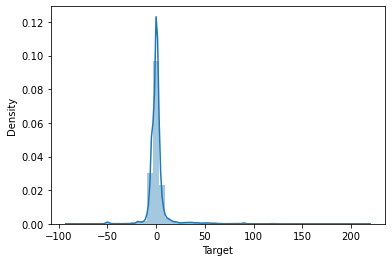

In [59]:
print(target_var.skew())
import seaborn as sns
sns.distplot(target_var)


In [60]:
#storing the numerical columns in a list
numerical_columns1 = list(train.columns[train.dtypes=='float64'])
numerical_columns1.extend(list(train.columns[train.dtypes=='int64']))
numerical_columns1

['buisness_year',
 'total_open_amount',
 'Target',
 'document_create_date1_year',
 'document_create_date1_month',
 'document_create_date1_day',
 'document_create_date_year',
 'document_create_date_month',
 'document_create_date_day',
 'posting_date_year',
 'posting_date_month',
 'posting_date_day',
 'due_in_date_year',
 'due_in_date_month',
 'due_in_date_day',
 'baseline_create_date_year',
 'baseline_create_date_month',
 'baseline_create_date_day']

In [61]:
#checking for the numerical columns
train[numerical_columns1].describe()

,buisness_year,total_open_amount,Target,document_create_date1_year,document_create_date1_month,document_create_date1_day,document_create_date_year,document_create_date_month,document_create_date_day,posting_date_year,posting_date_month,posting_date_day,due_in_date_year,due_in_date_month,due_in_date_day,baseline_create_date_year,baseline_create_date_month,baseline_create_date_day
count,38098.0,38098.000000,38098.000000,38098.000000,38098.000000,38098.000000,38098.000000,38098.000000,38098.000000,38098.000000,38098.000000,38098.000000,38098.000000,38098.000000,38098.000000,38098.000000,38098.000000,38098.000000
mean,2019.0,32101.533458,0.940679,2018.996220,6.027797,15.968371,2018.994252,6.028742,15.824820,2018.996220,6.027928,15.969972,2019.000472,6.552706,15.742795,2018.996273,6.036091,15.694157
std,0.0,40390.761346,10.886392,0.061364,3.124355,8.721511,0.075601,3.128234,8.703298,0.061364,3.124207,8.722219,0.024026,3.155275,8.791565,0.060938,3.125363,8.827938
min,2019.0,0.630000,-89.000000,2018.000000,1.000000,1.000000,2018.000000,1.000000,1.000000,2018.000000,1.000000,1.000000,2018.000000,1.000000,1.000000,2018.000000,1.000000,1.000000
25%,2019.0,4631.855000,-3.000000,2019.000000,3.000000,8.000000,2019.000000,3.000000,8.000000,2019.000000,3.000000,8.000000,2019.000000,4.000000,8.000000,2019.000000,3.000000,8.000000
50%,2019.0,17106.720000,0.000000,2019.000000,6.000000,16.000000,2019.000000,6.000000,16.000000,2019.000000,6.000000,16.000000,2019.000000,7.000000,15.000000,2019.000000,6.000000,16.000000
75%,2019.0,46421.807500,2.000000,2019.000000,9.000000,23.000000,2019.000000,9.000000,23.000000,2019.000000,9.000000,23.000000,2019.000000,9.000000,24.000000,2019.000000,9.000000,23.000000
max,2019.0,792010.970000,216.000000,2019.000000,12.000000,31.000000,2019.000000,12.000000,31.000000,2019.000000,12.000000,31.000000,2020.000000,12.000000,31.000000,2019.000000,12.000000,31.000000


0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='buisness_year', ylabel='Density'>

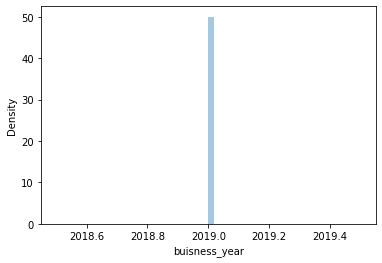

In [62]:
#checking for the buisness year
print(train['buisness_year'].skew())
sns.distplot(train['buisness_year'])

In [63]:
#dropping of buisness year as its standard deviation is 0 and  applying it to validation1 and validation2
train.drop(labels=['buisness_year'],axis=1,inplace=True)
val1.drop(labels=['buisness_year'],axis=1,inplace=True)
val2.drop(labels=['buisness_year'],axis=1,inplace=True)
Test_data.drop(labels=['buisness_year'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [235]:
#coverting all the date columnbs into year day and moth features
Test_data

,business_code,cust_number,name_customer,clear_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,Target,...,cube_tra,document_create_date1_Qtr,document_create_date1_day_of_week,weekend_day,buisness_value,avg_payment_terms,curr_code,avg_cust_delay,normalised_day_of_week,avg_cust_name
46802,U001,CCCA02,KRAFT llc,NaT,2020-02-27,2020-04-02,USD,15828.96,NAG2,NaN,...,NaN,1,Thursday,0,1,6.834734,1,7.389908,4,11.740000
47753,U001,0200769623,WAL-MAR systems,NaT,2020-02-27,2020-03-13,USD,1898.20,NAH4,NaN,...,NaN,1,Thursday,0,1,-1.827749,1,-2.207046,4,-2.195210
46988,U001,0200769623,WAL-MAR trust,NaT,2020-02-27,2020-03-13,USD,13839.91,NAH4,NaN,...,NaN,1,Thursday,0,1,-1.827749,1,-2.207046,4,-2.360595
46623,U001,0200769623,WAL-MAR systems,NaT,2020-02-27,2020-03-13,USD,77560.63,NAH4,NaN,...,NaN,1,Thursday,0,1,-1.827749,1,-2.207046,4,-2.195210
49802,U001,0200769623,WAL-MAR,NaT,2020-02-27,2020-03-13,USD,246.33,NAH4,NaN,...,NaN,1,Thursday,0,1,-1.827749,1,-2.207046,4,-2.347727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46139,U001,0,UPST systems,NaT,2020-05-12,2020-05-22,USD,20523.77,NA10,NaN,...,NaN,2,Tuesday,0,1,2.772277,1,3.897603,2,NaN
46454,U001,200769623,WAL-MAR associates,NaT,2020-05-12,2020-05-27,USD,3095.23,NAH4,NaN,...,NaN,2,Tuesday,0,1,-1.827749,1,-2.055402,2,-2.559301
46693,U001,0200915438,GROC us,NaT,2020-05-13,2020-05-28,USD,5216.00,NAA8,NaN,...,NaN,2,Wednesday,0,1,1.358679,1,1.464286,3,3.714286
48773,U001,100030964,NATURA us,NaT,2020-05-15,2020-05-30,USD,15902.25,NAA8,NaN,...,NaN,2,Friday,0,1,1.358679,1,-7.250000,5,-8.000000


In [65]:
#creating another list after dropping off buisness year as it might reflect on the earlier list
numerical_columns2 = list(train.columns[train.dtypes=='float64'])
numerical_columns2.extend(list(train.columns[train.dtypes=='int64']))
numerical_columns2

['total_open_amount',
 'Target',
 'document_create_date1_year',
 'document_create_date1_month',
 'document_create_date1_day',
 'document_create_date_year',
 'document_create_date_month',
 'document_create_date_day',
 'posting_date_year',
 'posting_date_month',
 'posting_date_day',
 'due_in_date_year',
 'due_in_date_month',
 'due_in_date_day',
 'baseline_create_date_year',
 'baseline_create_date_month',
 'baseline_create_date_day']

In [66]:
#checking to what extent the features are correlated to the target variable
train.corr().loc['Target',:]

total_open_amount              0.001180
Target                         1.000000
document_create_date1_year     0.003554
document_create_date1_month   -0.028516
document_create_date1_day     -0.010122
document_create_date_year     -0.008324
document_create_date_month    -0.025039
document_create_date_day      -0.014065
posting_date_year              0.003554
posting_date_month            -0.028218
posting_date_day              -0.008750
due_in_date_year              -0.040537
due_in_date_month             -0.046661
due_in_date_day               -0.011220
baseline_create_date_year      0.000735
baseline_create_date_month    -0.027457
baseline_create_date_day       0.004514
Name: Target, dtype: float64

In [67]:
#as the business year has standard deviation as 0 that means its an constant column and also evident from this informatiom that it is not at all required in our model as it contributes to nothing in predicting our target variable
#train1 = train.drop(labels=['buisness_year'],axis=1,inplace=False)
#train1.head()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='document_create_date1_year', ylabel='Target'>

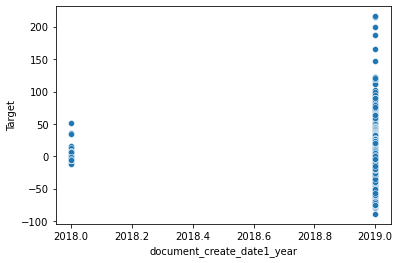

In [68]:
#as the document_create_date1 has the highest positive correlation with the target
sns.scatterplot(train['document_create_date1_year'],train['Target'])

In [69]:
#checking the correlation betweeen numerical columns
correlation=train[numerical_columns2].corr()
correlation.style.background_gradient(cmap='coolwarm').set_precision(2)


,total_open_amount,Target,document_create_date1_year,document_create_date1_month,document_create_date1_day,document_create_date_year,document_create_date_month,document_create_date_day,posting_date_year,posting_date_month,posting_date_day,due_in_date_year,due_in_date_month,due_in_date_day,baseline_create_date_year,baseline_create_date_month,baseline_create_date_day
total_open_amount,1.00,0.00,0.00,0.03,0.02,0.01,0.03,0.03,0.00,0.03,0.02,0.01,0.03,-0.01,0.01,0.03,0.04
Target,0.00,1.00,0.00,-0.03,-0.01,-0.01,-0.03,-0.01,0.00,-0.03,-0.01,-0.04,-0.05,-0.01,0.00,-0.03,0.00
document_create_date1_year,0.00,0.00,1.00,-0.12,-0.10,0.79,-0.11,-0.09,1.00,-0.12,-0.10,0.00,0.11,0.01,0.97,-0.11,-0.10
document_create_date1_month,0.03,-0.03,-0.12,1.00,-0.01,-0.05,0.99,-0.01,-0.12,1.00,-0.01,0.04,0.95,0.01,-0.11,1.00,-0.00
document_create_date1_day,0.02,-0.01,-0.10,-0.01,1.00,-0.04,-0.01,0.84,-0.10,-0.01,1.00,0.02,0.09,-0.37,-0.10,-0.00,0.95
document_create_date_year,0.01,-0.01,0.79,-0.05,-0.04,1.00,-0.15,-0.12,0.79,-0.05,-0.04,0.00,0.13,0.01,0.76,-0.04,-0.03
document_create_date_month,0.03,-0.03,-0.11,0.99,-0.01,-0.15,1.00,-0.01,-0.11,0.99,-0.01,0.04,0.94,0.01,-0.11,0.98,-0.00
document_create_date_day,0.03,-0.01,-0.09,-0.01,0.84,-0.12,-0.01,1.00,-0.09,-0.01,0.84,0.01,0.08,-0.38,-0.09,-0.00,0.79
posting_date_year,0.00,0.00,1.00,-0.12,-0.10,0.79,-0.11,-0.09,1.00,-0.12,-0.10,0.00,0.11,0.01,0.97,-0.11,-0.10
posting_date_month,0.03,-0.03,-0.12,1.00,-0.01,-0.05,0.99,-0.01,-0.12,1.00,-0.01,0.04,0.95,0.01,-0.11,1.00,-0.00


In [70]:
# need to remove any numerical columns as there are highly co-related numeric features with each other which is above 80 percent

train1 = train.drop(labels=['posting_date','posting_date_year','posting_date_month','posting_date_day','baseline_create_date_year','baseline_create_date_month','baseline_create_date_day','baseline_create_date','document_create_date','document_create_date_year','document_create_date_day','document_create_date_month'],axis=1,inplace=False)
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38098 entries, 14572 to 20196
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   business_code                38098 non-null  object        
 1   cust_number                  38098 non-null  object        
 2   name_customer                38098 non-null  object        
 3   clear_date                   38098 non-null  datetime64[ns]
 4   document_create_date.1       38098 non-null  datetime64[ns]
 5   due_in_date                  38098 non-null  datetime64[ns]
 6   invoice_currency             38098 non-null  object        
 7   document type                38098 non-null  object        
 8   total_open_amount            38098 non-null  float64       
 9   cust_payment_terms           38098 non-null  object        
 10  Target                       38098 non-null  int64         
 11  document_create_date1_year   38098 no

In [71]:
val1_x =val1.drop(labels=['posting_date','posting_date_year','posting_date_month','posting_date_day','baseline_create_date_year','baseline_create_date_month','baseline_create_date_day','baseline_create_date','document_create_date','document_create_date_year','document_create_date_day','document_create_date_month'],axis=1,inplace=False)
val2_x =val2.drop(labels=['posting_date','posting_date_year','posting_date_month','posting_date_day','baseline_create_date_year','baseline_create_date_month','baseline_create_date_day','baseline_create_date','document_create_date','document_create_date_year','document_create_date_day','document_create_date_month'],axis=1,inplace=False)

val1_x


,business_code,cust_number,name_customer,clear_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,Target,document_create_date1_year,document_create_date1_month,document_create_date1_day,due_in_date_year,due_in_date_month,due_in_date_day
44472,U001,0200875006,KROGER systems,2019-12-16,2019-11-29,2019-12-14,USD,RV,111322.14,NAA8,2,2019,11,29,2019,12,14
45106,U001,0200900909,SYSCO,2019-12-18,2019-11-29,2019-12-14,USD,RV,41239.27,NAA8,4,2019,11,29,2019,12,14
7186,U001,0200705742,DOT us,2019-12-16,2019-11-29,2019-12-19,USD,RV,3510.87,NAD1,-3,2019,11,29,2019,12,19
19117,U001,0200769623,WAL-MAR,2019-12-10,2019-11-29,2019-12-14,USD,RV,9624.88,NAH4,-4,2019,11,29,2019,12,14
22472,U001,0200769623,WAL-MAR us,2019-12-10,2019-11-29,2019-12-14,USD,RV,8949.70,NAH4,-4,2019,11,29,2019,12,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22407,U013,CC6050,HEIN trust,2020-04-16,2020-01-20,2020-03-05,USD,RV,24322.42,NAVF,42,2020,1,20,2020,3,5
38076,U001,0200762301,C&S WH foundation,2020-02-04,2020-01-20,2020-02-04,USD,RV,52391.48,NAC6,0,2020,1,20,2020,2,4
1299,U001,0200769623,WAL-MAR llc,2020-02-07,2020-01-20,2020-02-04,USD,RV,4228.97,NAH4,3,2020,1,20,2020,2,4
4384,U001,0200769623,WAL-MAR foundation,2020-02-03,2020-01-20,2020-02-04,USD,RV,32.36,NAH4,-1,2020,1,20,2020,2,4


In [72]:
#seperating the categorical columns in a different list
categorical_columns = list(train.columns[train.dtypes=='object'])
categorical_columns

['business_code',
 'cust_number',
 'name_customer',
 'invoice_currency',
 'document type',
 'cust_payment_terms']

In [73]:
#checking unique values under each categorical columns
train[categorical_columns].nunique()

business_code            6
cust_number           1358
name_customer         3950
invoice_currency         2
document type            2
cust_payment_terms      68
dtype: int64

3.0519039506283683


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

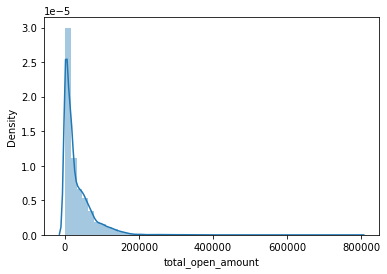

In [74]:
# checking for the total open amountas it had an positive correlation value with the target
print(train1['total_open_amount'].skew())
sns.distplot(train1['total_open_amount'])

-0.9487752131818868


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

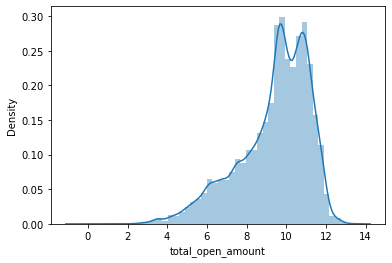

In [75]:
#logarithmic conversion as the open amount column has an positive skewness bringing it in rage of -0.5 to 0.5
log_tra = np.log(train1['total_open_amount'])
print(log_tra.skew())
sns.distplot(log_tra)

<ipython-input-76-e8b50bcf9278>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_data['cube_tra'] = train1['total_open_amount']**(1/3)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.2660905815566964


<AxesSubplot:xlabel='cube_tra', ylabel='Density'>

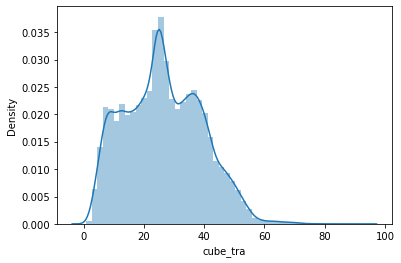

In [76]:
#cube root transformation and checking which is the best
#creating a feature in train dataset
train1['cube_tra'] = train1['total_open_amount']**(1/3)
val1_x['cube_tra'] = val1_x['total_open_amount']**(1/3)
val2_x['cube_tra'] = val2_x['total_open_amount']**(1/3)
Test_data['cube_tra'] = train1['total_open_amount']**(1/3)
print(train1['cube_tra'].skew())
sns.distplot(train1['cube_tra'])

-0.6425363549320395


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

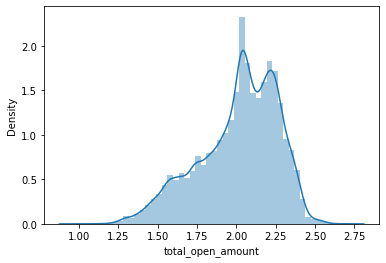

In [77]:
#logarithmic max conversion 
log_max = np.log(train1['total_open_amount'].max())
log1_tra = train1['total_open_amount']**(1/log_max)
print(log1_tra.skew())
sns.distplot(log1_tra)

In [78]:
#CUBE ROOT TRANSFORMATION BYFAR GIVES THE BEST RESULT

-16.173862783882782


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='document_create_date1_year', ylabel='Density'>

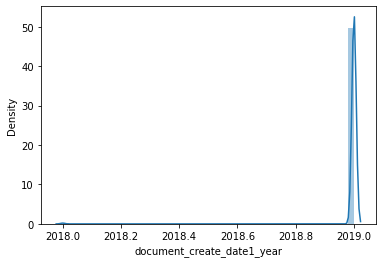

In [79]:
# checking for the total open amountas it had an positive correlation value with the target
print(train1['document_create_date1_year'].skew())
sns.distplot(train1['document_create_date1_year'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_open_amount'>

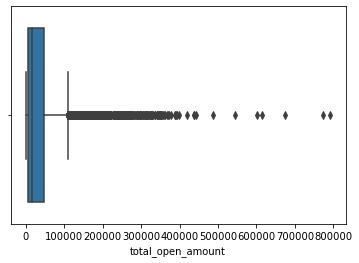

In [80]:
#checking for outliers in total amount data column
sns.boxplot(train1['total_open_amount'])

In [81]:
val1_x

,business_code,cust_number,name_customer,clear_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,Target,document_create_date1_year,document_create_date1_month,document_create_date1_day,due_in_date_year,due_in_date_month,due_in_date_day,cube_tra
44472,U001,0200875006,KROGER systems,2019-12-16,2019-11-29,2019-12-14,USD,RV,111322.14,NAA8,2,2019,11,29,2019,12,14,48.105402
45106,U001,0200900909,SYSCO,2019-12-18,2019-11-29,2019-12-14,USD,RV,41239.27,NAA8,4,2019,11,29,2019,12,14,34.549120
7186,U001,0200705742,DOT us,2019-12-16,2019-11-29,2019-12-19,USD,RV,3510.87,NAD1,-3,2019,11,29,2019,12,19,15.198647
19117,U001,0200769623,WAL-MAR,2019-12-10,2019-11-29,2019-12-14,USD,RV,9624.88,NAH4,-4,2019,11,29,2019,12,14,21.271516
22472,U001,0200769623,WAL-MAR us,2019-12-10,2019-11-29,2019-12-14,USD,RV,8949.70,NAH4,-4,2019,11,29,2019,12,14,20.762015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22407,U013,CC6050,HEIN trust,2020-04-16,2020-01-20,2020-03-05,USD,RV,24322.42,NAVF,42,2020,1,20,2020,3,5,28.973587
38076,U001,0200762301,C&S WH foundation,2020-02-04,2020-01-20,2020-02-04,USD,RV,52391.48,NAC6,0,2020,1,20,2020,2,4,37.418544
1299,U001,0200769623,WAL-MAR llc,2020-02-07,2020-01-20,2020-02-04,USD,RV,4228.97,NAH4,3,2020,1,20,2020,2,4,16.171298
4384,U001,0200769623,WAL-MAR foundation,2020-02-03,2020-01-20,2020-02-04,USD,RV,32.36,NAH4,-1,2020,1,20,2020,2,4,3.186663


In [82]:
#keeping track of null values
train1.isnull().sum()

business_code                  0
cust_number                    0
name_customer                  0
clear_date                     0
document_create_date.1         0
due_in_date                    0
invoice_currency               0
document type                  0
total_open_amount              0
cust_payment_terms             0
Target                         0
document_create_date1_year     0
document_create_date1_month    0
document_create_date1_day      0
due_in_date_year               0
due_in_date_month              0
due_in_date_day                0
cube_tra                       0
dtype: int64

In [83]:
train1['cust_number'].nunique()

1358

In [84]:
train1['document type'].value_counts()

RV    38093
X2        5
Name: document type, dtype: int64

In [85]:
train.nunique()

business_code                      6
cust_number                     1358
name_customer                   3950
clear_date                       301
posting_date                     335
document_create_date             341
document_create_date.1           335
due_in_date                      371
invoice_currency                   2
document type                      2
total_open_amount              34611
baseline_create_date             345
cust_payment_terms                68
Target                           177
document_create_date1_year         2
document_create_date1_month       12
document_create_date1_day         31
document_create_date_year          2
document_create_date_month        12
document_create_date_day          31
posting_date_year                  2
posting_date_month                12
posting_date_day                  31
due_in_date_year                   3
due_in_date_month                 12
due_in_date_day                   31
baseline_create_date_year          2
b

In [86]:
#encoding one of the categorical columns
doc_dict = {"RV":1, "X2":0}
train1['document type'] = train1['document type'].map(doc_dict)
train1['document type'].head()

14572    1
28273    1
19221    1
10645    1
5259     1
Name: document type, dtype: int64

In [87]:
#creating a new dataframe only the numerical columns of train1 set
df8 = train1.select_dtypes(include=['float64','int64','int32']).copy()
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38098 entries, 14572 to 20196
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   document type                38098 non-null  int64  
 1   total_open_amount            38098 non-null  float64
 2   Target                       38098 non-null  int64  
 3   document_create_date1_year   38098 non-null  int64  
 4   document_create_date1_month  38098 non-null  int64  
 5   document_create_date1_day    38098 non-null  int64  
 6   due_in_date_year             38098 non-null  int64  
 7   due_in_date_month            38098 non-null  int64  
 8   due_in_date_day              38098 non-null  int64  
 9   cube_tra                     38098 non-null  float64
dtypes: float64(2), int64(8)
memory usage: 4.4 MB


In [88]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.01)  # 0.1 indicates 99% of observations approximately

sel.fit(df8)  # fit finds the features with low variance

VarianceThreshold(threshold=0.01)

In [89]:
sel.get_support() #boolean function which returns True for quasi constant feature and false for the non-quasi constant feature


array([False,  True,  True, False,  True,  True, False,  True,  True,
        True])

In [90]:
# finally we can print the quasi-constant features
#print(
    #len([x for x in train1.columns if x not in train1.columns[sel.get_support()]]))

[x for x in df8.columns if x not in df8.columns[sel.get_support()]]

['document type', 'document_create_date1_year', 'due_in_date_year']

In [91]:
#dropping off the quasi constant variable
train1.drop(labels=['document type'],axis=1,inplace=True)
val1_x.drop(labels=['document type'],axis=1,inplace=True)
val2_x.drop(labels=['document type'],axis=1,inplace=True)
train1.head()

,business_code,cust_number,name_customer,clear_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,Target,document_create_date1_year,document_create_date1_month,document_create_date1_day,due_in_date_year,due_in_date_month,due_in_date_day,cube_tra
14572,U001,0200769623,WAL-MAR foundation,2019-01-10,2018-12-30,2019-01-14,USD,16256.92,NAH4,-4,2018,12,30,2019,1,14,25.332580
28273,U001,0200769623,WAL-MAR,2019-01-15,2018-12-30,2019-01-14,USD,70465.07,NAH4,1,2018,12,30,2019,1,14,41.303922
19221,U001,0200769623,WAL-MAR in,2019-01-09,2018-12-30,2019-01-14,USD,55040.77,NAH4,-5,2018,12,30,2019,1,14,38.038919
10645,U001,0200769623,WAL-MAR corp,2019-01-15,2018-12-30,2019-01-14,USD,11682.88,NAH4,1,2018,12,30,2019,1,14,22.690809
5259,U001,0200769623,WAL-MAR corp,2019-01-09,2018-12-30,2019-01-14,USD,1764.66,NAH4,-5,2018,12,30,2019,1,14,12.084268


In [92]:
# applying on test dataset 
Test_data.drop(labels=['document type'],axis=1,inplace=True)
Test_data

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,Target,document_create_date1_year,document_create_date1_month,document_create_date1_day,due_in_date_year,due_in_date_month,due_in_date_day,cube_tra
46802,U001,CCCA02,KRAFT llc,NaT,2020-02-27,20200224,2020-02-27,2020-04-02,USD,15828.96,20200227.0,NAG2,NaN,2020,2,27,2020,4,2,NaN
47753,U001,0200769623,WAL-MAR systems,NaT,2020-02-27,20200226,2020-02-27,2020-03-13,USD,1898.20,20200227.0,NAH4,NaN,2020,2,27,2020,3,13,NaN
46988,U001,0200769623,WAL-MAR trust,NaT,2020-02-27,20200225,2020-02-27,2020-03-13,USD,13839.91,20200227.0,NAH4,NaN,2020,2,27,2020,3,13,NaN
46623,U001,0200769623,WAL-MAR systems,NaT,2020-02-27,20200226,2020-02-27,2020-03-13,USD,77560.63,20200227.0,NAH4,NaN,2020,2,27,2020,3,13,NaN
49802,U001,0200769623,WAL-MAR,NaT,2020-02-27,20200226,2020-02-27,2020-03-13,USD,246.33,20200227.0,NAH4,NaN,2020,2,27,2020,3,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46139,U001,100051582,UPST systems,NaT,2020-05-12,20200511,2020-05-12,2020-05-22,USD,20523.77,20200512.0,NA10,NaN,2020,5,12,2020,5,22,NaN
46454,U001,200769623,WAL-MAR associates,NaT,2020-05-12,20200511,2020-05-12,2020-05-27,USD,3095.23,20200512.0,NAH4,NaN,2020,5,12,2020,5,27,NaN
46693,U001,0200915438,GROC us,NaT,2020-05-13,20200506,2020-05-13,2020-05-28,USD,5216.00,20200513.0,NAA8,NaN,2020,5,13,2020,5,28,NaN
48773,U001,100030964,NATURA us,NaT,2020-05-15,20200514,2020-05-15,2020-05-30,USD,15902.25,20200515.0,NAA8,NaN,2020,5,15,2020,5,30,NaN


In [93]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38098 entries, 14572 to 20196
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   business_code                38098 non-null  object        
 1   cust_number                  38098 non-null  object        
 2   name_customer                38098 non-null  object        
 3   clear_date                   38098 non-null  datetime64[ns]
 4   document_create_date.1       38098 non-null  datetime64[ns]
 5   due_in_date                  38098 non-null  datetime64[ns]
 6   invoice_currency             38098 non-null  object        
 7   total_open_amount            38098 non-null  float64       
 8   cust_payment_terms           38098 non-null  object        
 9   Target                       38098 non-null  int64         
 10  document_create_date1_year   38098 non-null  int64         
 11  document_create_date1_month  38098 no

In [94]:
val1_x

,business_code,cust_number,name_customer,clear_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,Target,document_create_date1_year,document_create_date1_month,document_create_date1_day,due_in_date_year,due_in_date_month,due_in_date_day,cube_tra
44472,U001,0200875006,KROGER systems,2019-12-16,2019-11-29,2019-12-14,USD,111322.14,NAA8,2,2019,11,29,2019,12,14,48.105402
45106,U001,0200900909,SYSCO,2019-12-18,2019-11-29,2019-12-14,USD,41239.27,NAA8,4,2019,11,29,2019,12,14,34.549120
7186,U001,0200705742,DOT us,2019-12-16,2019-11-29,2019-12-19,USD,3510.87,NAD1,-3,2019,11,29,2019,12,19,15.198647
19117,U001,0200769623,WAL-MAR,2019-12-10,2019-11-29,2019-12-14,USD,9624.88,NAH4,-4,2019,11,29,2019,12,14,21.271516
22472,U001,0200769623,WAL-MAR us,2019-12-10,2019-11-29,2019-12-14,USD,8949.70,NAH4,-4,2019,11,29,2019,12,14,20.762015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22407,U013,CC6050,HEIN trust,2020-04-16,2020-01-20,2020-03-05,USD,24322.42,NAVF,42,2020,1,20,2020,3,5,28.973587
38076,U001,0200762301,C&S WH foundation,2020-02-04,2020-01-20,2020-02-04,USD,52391.48,NAC6,0,2020,1,20,2020,2,4,37.418544
1299,U001,0200769623,WAL-MAR llc,2020-02-07,2020-01-20,2020-02-04,USD,4228.97,NAH4,3,2020,1,20,2020,2,4,16.171298
4384,U001,0200769623,WAL-MAR foundation,2020-02-03,2020-01-20,2020-02-04,USD,32.36,NAH4,-1,2020,1,20,2020,2,4,3.186663


In [95]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3902 entries, 46802 to 49035
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   business_code                3902 non-null   object        
 1   cust_number                  3902 non-null   object        
 2   name_customer                3902 non-null   object        
 3   clear_date                   0 non-null      datetime64[ns]
 4   posting_date                 3902 non-null   object        
 5   document_create_date         3902 non-null   int64         
 6   document_create_date.1       3902 non-null   datetime64[ns]
 7   due_in_date                  3902 non-null   datetime64[ns]
 8   invoice_currency             3902 non-null   object        
 9   total_open_amount            3902 non-null   float64       
 10  baseline_create_date         3902 non-null   float64       
 11  cust_payment_terms           3902 non-

In [96]:
Test_data.drop(labels=['baseline_create_date','posting_date','document_create_date'],axis=1,inplace=True)
Test_data.shape

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(3902, 17)

In [97]:
#handling of rare labels
#handling rare labels in categorical columns
non_rare_vars = train1.cust_number.value_counts().loc[lambda x: x>1].reset_index()['index']
non_rare_vars.head()

0    0200769623
1    0200726979
2    0200762301
3    0200759878
4    0200794332
Name: index, dtype: object

In [98]:
train1['cust_number'] = np.where(train1['cust_number'].isin(non_rare_vars),train1['cust_number'],0)
val1_x['cust_number'] = np.where(val1_x['cust_number'].isin(non_rare_vars),val1_x['cust_number'],0)
val2_x['cust_number'] = np.where(val2_x['cust_number'].isin(non_rare_vars),val2_x['cust_number'],0)
Test_data['cust_number'] = np.where(Test_data['cust_number'].isin(non_rare_vars),Test_data['cust_number'],0)

<ipython-input-98-118abcec3798>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_data['cust_number'] = np.where(Test_data['cust_number'].isin(non_rare_vars),Test_data['cust_number'],0)


In [99]:
#rare label handling of buisness code
non_rare_var1 = train1.business_code.value_counts().loc[lambda x: x>1].reset_index()['index']
non_rare_var1.head()

0    U001
1    CA02
2    U013
3    U002
4    U007
Name: index, dtype: object

In [100]:
train1['business_code'] = np.where(train1['business_code'].isin(non_rare_var1),train1['business_code'],"other")
val1_x['business_code'] = np.where(val1_x['business_code'].isin(non_rare_var1),val1_x['business_code'],"other")
val2_x['business_code'] = np.where(val2_x['business_code'].isin(non_rare_var1),val2_x['business_code'],"other")
Test_data['business_code'] = np.where(Test_data['business_code'].isin(non_rare_var1),Test_data['business_code'],"other")

<ipython-input-100-238676012138>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_data['business_code'] = np.where(Test_data['business_code'].isin(non_rare_var1),Test_data['business_code'],"other")


In [101]:
#checking the train data set and test data set for the changes made in train to be reflected upon the test
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38098 entries, 14572 to 20196
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   business_code                38098 non-null  object        
 1   cust_number                  38098 non-null  object        
 2   name_customer                38098 non-null  object        
 3   clear_date                   38098 non-null  datetime64[ns]
 4   document_create_date.1       38098 non-null  datetime64[ns]
 5   due_in_date                  38098 non-null  datetime64[ns]
 6   invoice_currency             38098 non-null  object        
 7   total_open_amount            38098 non-null  float64       
 8   cust_payment_terms           38098 non-null  object        
 9   Target                       38098 non-null  int64         
 10  document_create_date1_year   38098 non-null  int64         
 11  document_create_date1_month  38098 no

In [102]:
#converting the month into quarters
#applying them to all the splitted datasets
train1['document_create_date1_Qtr'] = pd.to_datetime(train1['document_create_date.1']).dt.quarter
train1.head()

,business_code,cust_number,name_customer,clear_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,Target,document_create_date1_year,document_create_date1_month,document_create_date1_day,due_in_date_year,due_in_date_month,due_in_date_day,cube_tra,document_create_date1_Qtr
14572,U001,0200769623,WAL-MAR foundation,2019-01-10,2018-12-30,2019-01-14,USD,16256.92,NAH4,-4,2018,12,30,2019,1,14,25.332580,4
28273,U001,0200769623,WAL-MAR,2019-01-15,2018-12-30,2019-01-14,USD,70465.07,NAH4,1,2018,12,30,2019,1,14,41.303922,4
19221,U001,0200769623,WAL-MAR in,2019-01-09,2018-12-30,2019-01-14,USD,55040.77,NAH4,-5,2018,12,30,2019,1,14,38.038919,4
10645,U001,0200769623,WAL-MAR corp,2019-01-15,2018-12-30,2019-01-14,USD,11682.88,NAH4,1,2018,12,30,2019,1,14,22.690809,4
5259,U001,0200769623,WAL-MAR corp,2019-01-09,2018-12-30,2019-01-14,USD,1764.66,NAH4,-5,2018,12,30,2019,1,14,12.084268,4


In [103]:
val1_x['document_create_date1_Qtr'] = pd.to_datetime(val1_x['document_create_date.1']).dt.quarter
val1_x.head()

,business_code,cust_number,name_customer,clear_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,Target,document_create_date1_year,document_create_date1_month,document_create_date1_day,due_in_date_year,due_in_date_month,due_in_date_day,cube_tra,document_create_date1_Qtr
44472,U001,0200875006,KROGER systems,2019-12-16,2019-11-29,2019-12-14,USD,111322.14,NAA8,2,2019,11,29,2019,12,14,48.105402,4
45106,U001,0200900909,SYSCO,2019-12-18,2019-11-29,2019-12-14,USD,41239.27,NAA8,4,2019,11,29,2019,12,14,34.549120,4
7186,U001,0200705742,DOT us,2019-12-16,2019-11-29,2019-12-19,USD,3510.87,NAD1,-3,2019,11,29,2019,12,19,15.198647,4
19117,U001,0200769623,WAL-MAR,2019-12-10,2019-11-29,2019-12-14,USD,9624.88,NAH4,-4,2019,11,29,2019,12,14,21.271516,4
22472,U001,0200769623,WAL-MAR us,2019-12-10,2019-11-29,2019-12-14,USD,8949.70,NAH4,-4,2019,11,29,2019,12,14,20.762015,4


In [104]:
val2_x['document_create_date1_Qtr'] = pd.to_datetime(val2_x['document_create_date.1']).dt.quarter
val2_x.head()

,business_code,cust_number,name_customer,clear_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,Target,document_create_date1_year,document_create_date1_month,document_create_date1_day,due_in_date_year,due_in_date_month,due_in_date_day,cube_tra,document_create_date1_Qtr
14763,U001,0200457993,SHAM systems,2020-01-23,2020-01-20,2020-02-04,USD,12884.29,NAA8,-12,2020,1,20,2020,2,4,23.443377,1
42010,U001,0200771157,WEIS corporation,2020-02-04,2020-01-20,2020-02-04,USD,114053.55,NAA8,0,2020,1,20,2020,2,4,48.495667,1
10859,U001,0200769623,WAL-MAR us,2020-01-30,2020-01-20,2020-02-04,USD,54791.56,NAH4,-5,2020,1,20,2020,2,4,37.981422,1
28570,U001,0200721222,GO llc,2020-01-31,2020-01-20,2020-02-04,USD,43248.56,NAA8,-4,2020,1,20,2020,2,4,35.101355,1
11901,U001,0200794332,COST corp,2020-02-04,2020-01-20,2020-02-04,USD,1477.56,NAAX,0,2020,1,20,2020,2,4,11.389772,1


In [105]:
Test_data['document_create_date1_Qtr'] = pd.to_datetime(Test_data['document_create_date.1']).dt.quarter
Test_data.head()

<ipython-input-105-02fe26f672dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_data['document_create_date1_Qtr'] = pd.to_datetime(Test_data['document_create_date.1']).dt.quarter


,business_code,cust_number,name_customer,clear_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,Target,document_create_date1_year,document_create_date1_month,document_create_date1_day,due_in_date_year,due_in_date_month,due_in_date_day,cube_tra,document_create_date1_Qtr
46802,U001,CCCA02,KRAFT llc,NaT,2020-02-27,2020-04-02,USD,15828.96,NAG2,NaN,2020,2,27,2020,4,2,NaN,1
47753,U001,0200769623,WAL-MAR systems,NaT,2020-02-27,2020-03-13,USD,1898.20,NAH4,NaN,2020,2,27,2020,3,13,NaN,1
46988,U001,0200769623,WAL-MAR trust,NaT,2020-02-27,2020-03-13,USD,13839.91,NAH4,NaN,2020,2,27,2020,3,13,NaN,1
46623,U001,0200769623,WAL-MAR systems,NaT,2020-02-27,2020-03-13,USD,77560.63,NAH4,NaN,2020,2,27,2020,3,13,NaN,1
49802,U001,0200769623,WAL-MAR,NaT,2020-02-27,2020-03-13,USD,246.33,NAH4,NaN,2020,2,27,2020,3,13,NaN,1


In [106]:
#checking for the quarters in the date
train1['document_create_date1_Qtr'].value_counts()


2    10786
3    10310
1    10082
4     6920
Name: document_create_date1_Qtr, dtype: int64

In [107]:
train1.shape

(38098, 18)

In [108]:
#converting the date into day of the week
#applying them to all the splitted datasets
train1['document_create_date1_day_of_week'] = pd.to_datetime(train1['document_create_date.1']).dt.day_name()
train1['document_create_date1_day_of_week']

14572    Sunday
28273    Sunday
19221    Sunday
10645    Sunday
5259     Sunday
          ...  
4639     Friday
35834    Friday
21851    Friday
9855     Friday
20196    Friday
Name: document_create_date1_day_of_week, Length: 38098, dtype: object

In [109]:
val1_x['document_create_date1_day_of_week'] = pd.to_datetime(val1_x['document_create_date.1']).dt.day_name()
val1_x['document_create_date1_day_of_week']

44472    Friday
45106    Friday
7186     Friday
19117    Friday
22472    Friday
          ...  
22407    Monday
38076    Monday
1299     Monday
4384     Monday
4775     Monday
Name: document_create_date1_day_of_week, Length: 3999, dtype: object

In [110]:
val2_x['document_create_date1_day_of_week'] = pd.to_datetime(val2_x['document_create_date.1']).dt.day_name()
val2_x['document_create_date1_day_of_week']

14763      Monday
42010      Monday
10859      Monday
28570      Monday
11901      Monday
           ...   
3493     Thursday
18724    Thursday
454      Thursday
33520    Thursday
705      Thursday
Name: document_create_date1_day_of_week, Length: 3999, dtype: object

In [111]:
Test_data['document_create_date1_day_of_week'] = pd.to_datetime(Test_data['document_create_date.1']).dt.day_name()
Test_data['document_create_date1_day_of_week']

<ipython-input-111-f6516e92879e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_data['document_create_date1_day_of_week'] = pd.to_datetime(Test_data['document_create_date.1']).dt.day_name()


46802     Thursday
47753     Thursday
46988     Thursday
46623     Thursday
49802     Thursday
           ...    
46139      Tuesday
46454      Tuesday
46693    Wednesday
48773       Friday
49035      Tuesday
Name: document_create_date1_day_of_week, Length: 3902, dtype: object

In [112]:
train1.shape

(38098, 19)

In [113]:
#creating a column to check whether the date is weekend or not
train1['weekend_day']=np.where(train1.document_create_date1_day_of_week.isin(['Saturday','Sunday']),1,0)
train1['weekend_day']

14572    1
28273    1
19221    1
10645    1
5259     1
        ..
4639     0
35834    0
21851    0
9855     0
20196    0
Name: weekend_day, Length: 38098, dtype: int32

In [114]:
val1_x['weekend_day']=np.where(val1_x.document_create_date1_day_of_week.isin(['Saturday','Sunday']),1,0)
val1_x['weekend_day']

44472    0
45106    0
7186     0
19117    0
22472    0
        ..
22407    0
38076    0
1299     0
4384     0
4775     0
Name: weekend_day, Length: 3999, dtype: int32

In [115]:
val2_x['weekend_day']=np.where(val2_x.document_create_date1_day_of_week.isin(['Saturday','Sunday']),1,0)
val2_x['weekend_day']

14763    0
42010    0
10859    0
28570    0
11901    0
        ..
3493     0
18724    0
454      0
33520    0
705      0
Name: weekend_day, Length: 3999, dtype: int32

In [116]:
Test_data['weekend_day']=np.where(Test_data.document_create_date1_day_of_week.isin(['Saturday','Sunday']),1,0)
Test_data['weekend_day']

<ipython-input-116-17b9f9863625>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_data['weekend_day']=np.where(Test_data.document_create_date1_day_of_week.isin(['Saturday','Sunday']),1,0)


46802    0
47753    0
46988    0
46623    0
49802    0
        ..
46139    0
46454    0
46693    0
48773    0
49035    0
Name: weekend_day, Length: 3902, dtype: int32

In [117]:
train1.nunique()

business_code                            6
cust_number                            900
name_customer                         3950
clear_date                             301
document_create_date.1                 335
due_in_date                            371
invoice_currency                         2
total_open_amount                    34611
cust_payment_terms                      68
Target                                 177
document_create_date1_year               2
document_create_date1_month             12
document_create_date1_day               31
due_in_date_year                         3
due_in_date_month                       12
due_in_date_day                         31
cube_tra                             34611
document_create_date1_Qtr                4
document_create_date1_day_of_week        7
weekend_day                              2
dtype: int64

In [118]:
train1.shape

(38098, 20)

In [119]:
Test_data

,business_code,cust_number,name_customer,clear_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,Target,document_create_date1_year,document_create_date1_month,document_create_date1_day,due_in_date_year,due_in_date_month,due_in_date_day,cube_tra,document_create_date1_Qtr,document_create_date1_day_of_week,weekend_day
46802,U001,CCCA02,KRAFT llc,NaT,2020-02-27,2020-04-02,USD,15828.96,NAG2,NaN,2020,2,27,2020,4,2,NaN,1,Thursday,0
47753,U001,0200769623,WAL-MAR systems,NaT,2020-02-27,2020-03-13,USD,1898.20,NAH4,NaN,2020,2,27,2020,3,13,NaN,1,Thursday,0
46988,U001,0200769623,WAL-MAR trust,NaT,2020-02-27,2020-03-13,USD,13839.91,NAH4,NaN,2020,2,27,2020,3,13,NaN,1,Thursday,0
46623,U001,0200769623,WAL-MAR systems,NaT,2020-02-27,2020-03-13,USD,77560.63,NAH4,NaN,2020,2,27,2020,3,13,NaN,1,Thursday,0
49802,U001,0200769623,WAL-MAR,NaT,2020-02-27,2020-03-13,USD,246.33,NAH4,NaN,2020,2,27,2020,3,13,NaN,1,Thursday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46139,U001,0,UPST systems,NaT,2020-05-12,2020-05-22,USD,20523.77,NA10,NaN,2020,5,12,2020,5,22,NaN,2,Tuesday,0
46454,U001,200769623,WAL-MAR associates,NaT,2020-05-12,2020-05-27,USD,3095.23,NAH4,NaN,2020,5,12,2020,5,27,NaN,2,Tuesday,0
46693,U001,0200915438,GROC us,NaT,2020-05-13,2020-05-28,USD,5216.00,NAA8,NaN,2020,5,13,2020,5,28,NaN,2,Wednesday,0
48773,U001,100030964,NATURA us,NaT,2020-05-15,2020-05-30,USD,15902.25,NAA8,NaN,2020,5,15,2020,5,30,NaN,2,Friday,0


In [120]:
due_date = Test_data[['due_in_date']]
due_date

,due_in_date
46802,2020-04-02
47753,2020-03-13
46988,2020-03-13
46623,2020-03-13
49802,2020-03-13
...,...
46139,2020-05-22
46454,2020-05-27
46693,2020-05-28
48773,2020-05-30


In [121]:
#label encoding the buisness code column
#one_hot_buisness_code= pd.get_dummies(train1['business_code'])
#one_hot_buisness_code
dict1={}
count = 1
for i in train1['business_code'].unique():
     dict1[i]= count
     count = count+1
dict1

{'U001': 1, 'CA02': 2, 'U013': 3, 'U002': 4, 'U005': 5, 'U007': 6}

In [122]:
train1['buisness_value'] = train1['business_code'].map(dict1)

val2_x['buisness_value'] = val2_x['business_code'].map(dict1)
val1_x['buisness_value'] = val1_x['business_code'].map(dict1)
Test_data['buisness_value'] = Test_data['business_code'].map(dict1)
Test_data

<ipython-input-122-df81e38dc3e6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_data['buisness_value'] = Test_data['business_code'].map(dict1)


,business_code,cust_number,name_customer,clear_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,Target,...,document_create_date1_month,document_create_date1_day,due_in_date_year,due_in_date_month,due_in_date_day,cube_tra,document_create_date1_Qtr,document_create_date1_day_of_week,weekend_day,buisness_value
46802,U001,CCCA02,KRAFT llc,NaT,2020-02-27,2020-04-02,USD,15828.96,NAG2,NaN,...,2,27,2020,4,2,NaN,1,Thursday,0,1
47753,U001,0200769623,WAL-MAR systems,NaT,2020-02-27,2020-03-13,USD,1898.20,NAH4,NaN,...,2,27,2020,3,13,NaN,1,Thursday,0,1
46988,U001,0200769623,WAL-MAR trust,NaT,2020-02-27,2020-03-13,USD,13839.91,NAH4,NaN,...,2,27,2020,3,13,NaN,1,Thursday,0,1
46623,U001,0200769623,WAL-MAR systems,NaT,2020-02-27,2020-03-13,USD,77560.63,NAH4,NaN,...,2,27,2020,3,13,NaN,1,Thursday,0,1
49802,U001,0200769623,WAL-MAR,NaT,2020-02-27,2020-03-13,USD,246.33,NAH4,NaN,...,2,27,2020,3,13,NaN,1,Thursday,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46139,U001,0,UPST systems,NaT,2020-05-12,2020-05-22,USD,20523.77,NA10,NaN,...,5,12,2020,5,22,NaN,2,Tuesday,0,1
46454,U001,200769623,WAL-MAR associates,NaT,2020-05-12,2020-05-27,USD,3095.23,NAH4,NaN,...,5,12,2020,5,27,NaN,2,Tuesday,0,1
46693,U001,0200915438,GROC us,NaT,2020-05-13,2020-05-28,USD,5216.00,NAA8,NaN,...,5,13,2020,5,28,NaN,2,Wednesday,0,1
48773,U001,100030964,NATURA us,NaT,2020-05-15,2020-05-30,USD,15902.25,NAA8,NaN,...,5,15,2020,5,30,NaN,2,Friday,0,1


In [123]:
#concatinating the dummy rows to our train test and validation dataset
#train1 = pd.concat([train1,one_hot_buisness_code],axis=1)
#one_hot_buisness_code1= pd.get_dummies(val1_x['business_code'])
#one_hot_buisness_code1
#val1_x = pd.concat([val1_x,one_hot_buisness_code1],axis=1)
#one_hot_buisness_code2= pd.get_dummies(val2_x['business_code'])
#one_hot_buisness_code2
#val2_x = pd.concat([val2_x,one_hot_buisness_code2],axis=1)
#one_hot_buisness_code3= pd.get_dummies(Test_data['business_code'])
#one_hot_buisness_code3
#Test_data = pd.concat([Test_data,one_hot_buisness_code3],axis=1)
#val1_x

In [124]:
val1_x

,business_code,cust_number,name_customer,clear_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,Target,...,document_create_date1_month,document_create_date1_day,due_in_date_year,due_in_date_month,due_in_date_day,cube_tra,document_create_date1_Qtr,document_create_date1_day_of_week,weekend_day,buisness_value
44472,U001,0200875006,KROGER systems,2019-12-16,2019-11-29,2019-12-14,USD,111322.14,NAA8,2,...,11,29,2019,12,14,48.105402,4,Friday,0,1
45106,U001,0200900909,SYSCO,2019-12-18,2019-11-29,2019-12-14,USD,41239.27,NAA8,4,...,11,29,2019,12,14,34.549120,4,Friday,0,1
7186,U001,0200705742,DOT us,2019-12-16,2019-11-29,2019-12-19,USD,3510.87,NAD1,-3,...,11,29,2019,12,19,15.198647,4,Friday,0,1
19117,U001,0200769623,WAL-MAR,2019-12-10,2019-11-29,2019-12-14,USD,9624.88,NAH4,-4,...,11,29,2019,12,14,21.271516,4,Friday,0,1
22472,U001,0200769623,WAL-MAR us,2019-12-10,2019-11-29,2019-12-14,USD,8949.70,NAH4,-4,...,11,29,2019,12,14,20.762015,4,Friday,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22407,U013,CC6050,HEIN trust,2020-04-16,2020-01-20,2020-03-05,USD,24322.42,NAVF,42,...,1,20,2020,3,5,28.973587,1,Monday,0,3
38076,U001,0200762301,C&S WH foundation,2020-02-04,2020-01-20,2020-02-04,USD,52391.48,NAC6,0,...,1,20,2020,2,4,37.418544,1,Monday,0,1
1299,U001,0200769623,WAL-MAR llc,2020-02-07,2020-01-20,2020-02-04,USD,4228.97,NAH4,3,...,1,20,2020,2,4,16.171298,1,Monday,0,1
4384,U001,0200769623,WAL-MAR foundation,2020-02-03,2020-01-20,2020-02-04,USD,32.36,NAH4,-1,...,1,20,2020,2,4,3.186663,1,Monday,0,1


In [125]:
train1.nunique()

business_code                            6
cust_number                            900
name_customer                         3950
clear_date                             301
document_create_date.1                 335
due_in_date                            371
invoice_currency                         2
total_open_amount                    34611
cust_payment_terms                      68
Target                                 177
document_create_date1_year               2
document_create_date1_month             12
document_create_date1_day               31
due_in_date_year                         3
due_in_date_month                       12
due_in_date_day                         31
cube_tra                             34611
document_create_date1_Qtr                4
document_create_date1_day_of_week        7
weekend_day                              2
buisness_value                           6
dtype: int64

In [126]:
#target encoding the customer payment terms by grouping the mean of target variable with cust_payment_terms
mapper1 = train1.groupby('cust_payment_terms')['Target'].mean().to_dict()
mapper1

{'90M7': -56.0,
 'B052': -17.75,
 'B112': 5.0,
 'BR12': -8.0,
 'BR56': 3.2222222222222223,
 'C106': -0.8125,
 'CA10': 6.123878536922015,
 'CA30': -3.235294117647059,
 'CA60': 3.0,
 'CAB1': 6.5,
 'CAX2': 20.0,
 'NA10': 2.772277227722772,
 'NA24': -36.5,
 'NA25': -0.2,
 'NA31': -7.5,
 'NA32': -4.486531986531986,
 'NA38': 2.5294117647058822,
 'NA3B': -6.457142857142857,
 'NA3F': 12.777777777777779,
 'NA84': -3.2857142857142856,
 'NA8Q': 29.75,
 'NA9X': -6.916666666666667,
 'NAA8': 1.3586786551993746,
 'NAAW': -15.192090395480227,
 'NAAX': 0.31042128603104213,
 'NAB1': 11.5,
 'NABG': -7.25,
 'NAC6': 0.3546468401486989,
 'NACB': 7.090909090909091,
 'NAD1': 0.24556616643929058,
 'NAD4': 16.90909090909091,
 'NAD5': 8.985074626865671,
 'NAD8': 7.0,
 'NAG2': 6.834733893557423,
 'NAGD': -13.01109057301294,
 'NAH4': -1.8277487961476726,
 'NAM1': 2.097560975609756,
 'NAM2': -0.9205607476635514,
 'NAM3': 17.4,
 'NAM4': -7.301010101010101,
 'NANC': 3.0,
 'NATH': 1.0,
 'NATK': 2.0,
 'NATL': 15.0,
 'N

In [127]:
#APPLYING THE DICTIONARY MADE IN TRAIN SET TO THE TRAIN ,VALIDATION1,VALIDATION2 ,TEST DATASETS
train1['avg_payment_terms'] = train1['cust_payment_terms'].map(mapper1)
train1['avg_payment_terms'].head()

14572   -1.827749
28273   -1.827749
19221   -1.827749
10645   -1.827749
5259    -1.827749
Name: avg_payment_terms, dtype: float64

In [128]:
val1_x['avg_payment_terms'] = val1_x['cust_payment_terms'].map(mapper1)
val1_x['avg_payment_terms'].head()

44472    1.358679
45106    1.358679
7186     0.245566
19117   -1.827749
22472   -1.827749
Name: avg_payment_terms, dtype: float64

In [129]:
val2_x['avg_payment_terms'] = val2_x['cust_payment_terms'].map(mapper1)
val2_x['avg_payment_terms'].head()

14763    1.358679
42010    1.358679
10859   -1.827749
28570    1.358679
11901    0.310421
Name: avg_payment_terms, dtype: float64

In [130]:
Test_data['avg_payment_terms'] = Test_data['cust_payment_terms'].map(mapper1)
Test_data['avg_payment_terms'].head()

<ipython-input-130-7b0d68d37fc5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_data['avg_payment_terms'] = Test_data['cust_payment_terms'].map(mapper1)


46802    6.834734
47753   -1.827749
46988   -1.827749
46623   -1.827749
49802   -1.827749
Name: avg_payment_terms, dtype: float64

In [131]:
train1.corr().loc['Target',:]

total_open_amount              0.001180
Target                         1.000000
document_create_date1_year     0.003554
document_create_date1_month   -0.028516
document_create_date1_day     -0.010122
due_in_date_year              -0.040537
due_in_date_month             -0.046661
due_in_date_day               -0.011220
cube_tra                       0.003463
document_create_date1_Qtr     -0.027118
weekend_day                   -0.003546
buisness_value                 0.155261
avg_payment_terms              0.591319
Name: Target, dtype: float64

In [132]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38098 entries, 14572 to 20196
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   business_code                      38098 non-null  object        
 1   cust_number                        38098 non-null  object        
 2   name_customer                      38098 non-null  object        
 3   clear_date                         38098 non-null  datetime64[ns]
 4   document_create_date.1             38098 non-null  datetime64[ns]
 5   due_in_date                        38098 non-null  datetime64[ns]
 6   invoice_currency                   38098 non-null  object        
 7   total_open_amount                  38098 non-null  float64       
 8   cust_payment_terms                 38098 non-null  object        
 9   Target                             38098 non-null  int64         
 10  document_create_date1_year    

In [133]:
#label encoding the invoice_currency column
train['invoice_currency'].value_counts()

USD    35116
CAD     2982
Name: invoice_currency, dtype: int64

In [134]:
#mapping on train set done
dict2 = {"USD":1,"CAD":0}
train1['curr_code'] = train1['invoice_currency'].map(dict2)
train1['curr_code']

14572    1
28273    1
19221    1
10645    1
5259     1
        ..
4639     1
35834    1
21851    1
9855     1
20196    1
Name: curr_code, Length: 38098, dtype: int64

In [135]:
#mapping to be done on validation1 set
val1_x['curr_code'] = val1_x['invoice_currency'].map(dict2)
val1_x['curr_code']

44472    1
45106    1
7186     1
19117    1
22472    1
        ..
22407    1
38076    1
1299     1
4384     1
4775     1
Name: curr_code, Length: 3999, dtype: int64

In [136]:
#mapping done on the validation 2 dataset
val2_x['curr_code'] = val2_x['invoice_currency'].map(dict2)
val2_x['curr_code']

14763    1
42010    1
10859    1
28570    1
11901    1
        ..
3493     0
18724    1
454      0
33520    1
705      1
Name: curr_code, Length: 3999, dtype: int64

In [137]:
#mapping done on the test dataset
Test_data['curr_code'] = Test_data['invoice_currency'].map(dict2)
Test_data['curr_code']

<ipython-input-137-d48e39ecf7ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_data['curr_code'] = Test_data['invoice_currency'].map(dict2)


46802    1
47753    1
46988    1
46623    1
49802    1
        ..
46139    1
46454    1
46693    1
48773    1
49035    0
Name: curr_code, Length: 3902, dtype: int64

In [138]:
val1_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 44472 to 4775
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   business_code                      3999 non-null   object        
 1   cust_number                        3999 non-null   object        
 2   name_customer                      3999 non-null   object        
 3   clear_date                         3999 non-null   datetime64[ns]
 4   document_create_date.1             3999 non-null   datetime64[ns]
 5   due_in_date                        3999 non-null   datetime64[ns]
 6   invoice_currency                   3999 non-null   object        
 7   total_open_amount                  3999 non-null   float64       
 8   cust_payment_terms                 3999 non-null   object        
 9   Target                             3999 non-null   int64         
 10  document_create_date1_year      

In [139]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38098 entries, 14572 to 20196
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   business_code                      38098 non-null  object        
 1   cust_number                        38098 non-null  object        
 2   name_customer                      38098 non-null  object        
 3   clear_date                         38098 non-null  datetime64[ns]
 4   document_create_date.1             38098 non-null  datetime64[ns]
 5   due_in_date                        38098 non-null  datetime64[ns]
 6   invoice_currency                   38098 non-null  object        
 7   total_open_amount                  38098 non-null  float64       
 8   cust_payment_terms                 38098 non-null  object        
 9   Target                             38098 non-null  int64         
 10  document_create_date1_year    

In [140]:
#
train1.corr().loc['Target',:]

total_open_amount              0.001180
Target                         1.000000
document_create_date1_year     0.003554
document_create_date1_month   -0.028516
document_create_date1_day     -0.010122
due_in_date_year              -0.040537
due_in_date_month             -0.046661
due_in_date_day               -0.011220
cube_tra                       0.003463
document_create_date1_Qtr     -0.027118
weekend_day                   -0.003546
buisness_value                 0.155261
avg_payment_terms              0.591319
curr_code                     -0.135996
Name: Target, dtype: float64

In [141]:
#encoding the customer number with the target variable
mapper2 = train1.groupby('cust_number')['Target'].mean().to_dict()
mapper2

{0: 3.89760348583878,
 '0100000051': -7.0,
 '0100000158': 14.857142857142858,
 '0100000217': -2.6,
 '0100000222': -4.25,
 '0100000843': 3.0,
 '0100000933': -3.3333333333333335,
 '0100001196': 1.53125,
 '0100001222': 1.0,
 '0100003940': 1.0,
 '0100004317': 3.0,
 '0100004536': -0.75,
 '0100004744': 0.0,
 '0100006311': -1.5789473684210527,
 '0100007796': 0.6666666666666666,
 '0100007916': -20.375,
 '0100008001': -2.642857142857143,
 '0100008347': 15.0,
 '0100009866': 2.0,
 '0100009932': 2.0,
 '0100010265': 3.3333333333333335,
 '0100011895': 1.75,
 '0100011958': -4.166666666666667,
 '0100012023': -36.5,
 '0100012638': 0.72,
 '0100012698': 3.0,
 '0100012991': -2.0,
 '0100013335': 5.666666666666667,
 '0100013928': 2.857142857142857,
 '0100014724': -5.166666666666667,
 '0100015455': -3.0,
 '0100015557': 3.0,
 '0100015818': 8.333333333333334,
 '0100016691': 4.363636363636363,
 '0100017545': -4.571428571428571,
 '0100017728': 1.0,
 '0100018048': 1.0,
 '0100019293': 4.0,
 '0100019410': -3.0,
 '0

In [142]:
#applying on the train validation and test set
train1['avg_cust_delay'] = train1['cust_number'].map(mapper2)
train1['avg_cust_delay'].head()

14572   -2.207046
28273   -2.207046
19221   -2.207046
10645   -2.207046
5259    -2.207046
Name: avg_cust_delay, dtype: float64

In [143]:
#on test data
Test_data['avg_cust_delay'] = Test_data['cust_number'].map(mapper2)
Test_data.info()

<ipython-input-143-6482f2232c62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_data['avg_cust_delay'] = Test_data['cust_number'].map(mapper2)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3902 entries, 46802 to 49035
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   business_code                      3902 non-null   object        
 1   cust_number                        3902 non-null   object        
 2   name_customer                      3902 non-null   object        
 3   clear_date                         0 non-null      datetime64[ns]
 4   document_create_date.1             3902 non-null   datetime64[ns]
 5   due_in_date                        3902 non-null   datetime64[ns]
 6   invoice_currency                   3902 non-null   object        
 7   total_open_amount                  3902 non-null   float64       
 8   cust_payment_terms                 3902 non-null   object        
 9   Target                             0 non-null      float64       
 10  document_create_date1_year     

In [144]:
#on validation 2 data
val2_x['avg_cust_delay'] = val2_x['cust_number'].map(mapper2)
val2_x['avg_cust_delay']

14763   -6.863636
42010    3.875000
10859   -2.207046
28570   -1.108696
11901   -0.275776
           ...   
3493     1.411765
18724    0.644068
454      9.045822
33520    1.277778
705      1.244444
Name: avg_cust_delay, Length: 3999, dtype: float64

In [145]:
val1_x['avg_cust_delay'] = val1_x['cust_number'].map(mapper2)
val1_x['avg_cust_delay'].head()

44472    0.545455
45106    1.611111
7186    -7.071885
19117   -2.207046
22472   -2.207046
Name: avg_cust_delay, dtype: float64

In [146]:
train1['document_create_date1_day_of_week'].value_counts()

Wednesday    6860
Thursday     6496
Tuesday      6376
Friday       6357
Monday       5346
Saturday     3671
Sunday       2992
Name: document_create_date1_day_of_week, dtype: int64

In [147]:
dict3 = {"Monday":1,"Tuesday":2,"Wednesday":3,"Thursday":4,"Friday":5,"Saturday":6,"Sunday":7}
train1['normalised_day_of_week'] = train1['document_create_date1_day_of_week'].map(dict3)
val1_x['normalised_day_of_week'] = val1_x['document_create_date1_day_of_week'].map(dict3)
val2_x['normalised_day_of_week'] = val2_x['document_create_date1_day_of_week'].map(dict3)
Test_data['normalised_day_of_week'] = Test_data['document_create_date1_day_of_week'].map(dict3)

<ipython-input-147-1ff64fff9ac3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_data['normalised_day_of_week'] = Test_data['document_create_date1_day_of_week'].map(dict3)


In [148]:
val2_x.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 14763 to 705
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   business_code                      3999 non-null   object        
 1   cust_number                        3999 non-null   object        
 2   name_customer                      3999 non-null   object        
 3   clear_date                         3999 non-null   datetime64[ns]
 4   document_create_date.1             3999 non-null   datetime64[ns]
 5   due_in_date                        3999 non-null   datetime64[ns]
 6   invoice_currency                   3999 non-null   object        
 7   total_open_amount                  3999 non-null   float64       
 8   cust_payment_terms                 3999 non-null   object        
 9   Target                             3999 non-null   int64         
 10  document_create_date1_year       

In [149]:
#imputing null at 5 records in avg payment terms
train1['avg_payment_terms'] = np.where(train1['avg_payment_terms'].isnull(),train1['avg_payment_terms'].mean(),train1['avg_payment_terms'])
val1_x['avg_payment_terms'] = np.where(val1_x['avg_payment_terms'].isnull(),val1_x['avg_payment_terms'].mean(),val1_x['avg_payment_terms'])
val2_x['avg_payment_terms'] = np.where(val2_x['avg_payment_terms'].isnull(),val2_x['avg_payment_terms'].mean(),val2_x['avg_payment_terms'])
Test_data['avg_payment_terms'] = np.where(Test_data['avg_payment_terms'].isnull(),Test_data['avg_payment_terms'].mean(),Test_data['avg_payment_terms'])

<ipython-input-149-4fb47e25065b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_data['avg_payment_terms'] = np.where(Test_data['avg_payment_terms'].isnull(),Test_data['avg_payment_terms'].mean(),Test_data['avg_payment_terms'])


In [150]:
#applying target encoding on cutomer name column
mapper3 = train1.groupby('name_customer')['Target'].mean().to_dict()
mapper3

{'11-17  ': 14.0,
 '113712 CA corp': 2.0,
 '113712 CA systems': 0.0,
 '17135 associates': 6.0,
 '17135 corp': 3.0,
 '17135 in': 3.0,
 '17135 us': -1.0,
 '236008 trust': 1.0,
 '31650 in': 8.0,
 '31650 us': 5.0,
 '7 - E in': -10.0,
 '7 - E trust': -12.0,
 '7 ELEVE ': 6.0,
 '99 CE ': 1.3333333333333333,
 '99 CE associates': 5.25,
 '99 CE co': 1.0,
 '99 CE corp': 1.0,
 '99 CE corporation': 4.5,
 '99 CE foundation': -10.0,
 '99 CE in': 1.5,
 '99 CE llc': 1.75,
 '99 CE systems': 1.0,
 '99 CE trust': 1.0,
 '99 CE us': 2.0,
 '99C  trust': 29.0,
 'A & W F ': 1.25,
 'A & W F co': 4.0,
 'A & W F corp': 4.0,
 'A & W F corporation': -0.5,
 'A & W F foundation': 4.0,
 'A & W F in': 5.666666666666667,
 'A & W F llc': 1.0,
 'A & W F systems': 4.0,
 'A & W F trust': -1.0,
 'A & W F us': 1.0,
 'ACE  corp': -5.0,
 'ACE  systems': 0.0,
 'ACE  trust': 0.0,
 'ACE  us': 0.0,
 'ADAMS in': -2.0,
 'ADEL systems': 0.0,
 'ADVANCED us': 68.0,
 'AFFI ': -6.0,
 'AFFI co': -1.0,
 'AFFI corp': -7.0,
 'AFFI foundation'

In [151]:
train1['avg_cust_name'] = train1['name_customer'].map(mapper3)
val1_x['avg_cust_name'] = val1_x['name_customer'].map(mapper3)
val2_x['avg_cust_name'] = val2_x['name_customer'].map(mapper3)
Test_data['avg_cust_name'] = Test_data['name_customer'].map(mapper3)

<ipython-input-151-bf58f85c934e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_data['avg_cust_name'] = Test_data['name_customer'].map(mapper3)


In [152]:
#checking the correlation of the featires for the highly corelated feature to be dropped
train1.corr().loc['Target',:]

total_open_amount              0.001180
Target                         1.000000
document_create_date1_year     0.003554
document_create_date1_month   -0.028516
document_create_date1_day     -0.010122
due_in_date_year              -0.040537
due_in_date_month             -0.046661
due_in_date_day               -0.011220
cube_tra                       0.003463
document_create_date1_Qtr     -0.027118
weekend_day                   -0.003546
buisness_value                 0.155261
avg_payment_terms              0.591319
curr_code                     -0.135996
avg_cust_delay                 0.654469
normalised_day_of_week         0.004225
avg_cust_name                  0.707619
Name: Target, dtype: float64

In [153]:
#dropping of the object type and datetype in train,test,validation dataset
train2 = train1.drop(labels=['business_code','cust_number','name_customer','invoice_currency','document_create_date.1','due_in_date','clear_date','cust_payment_terms','document_create_date1_day_of_week','avg_cust_name'],axis=1,inplace=False)
train2['document_create_date1_year'].value_counts()

2019    37954
2018      144
Name: document_create_date1_year, dtype: int64

In [154]:
val1_x2 = val1_x.drop(labels=['business_code','cust_number','name_customer','invoice_currency','document_create_date.1','due_in_date','clear_date','cust_payment_terms','document_create_date1_day_of_week','avg_cust_name'],axis=1,inplace=False)
val1_x2

,total_open_amount,Target,document_create_date1_year,document_create_date1_month,document_create_date1_day,due_in_date_year,due_in_date_month,due_in_date_day,cube_tra,document_create_date1_Qtr,weekend_day,buisness_value,avg_payment_terms,curr_code,avg_cust_delay,normalised_day_of_week
44472,111322.14,2,2019,11,29,2019,12,14,48.105402,4,0,1,1.358679,1,0.545455,5
45106,41239.27,4,2019,11,29,2019,12,14,34.549120,4,0,1,1.358679,1,1.611111,5
7186,3510.87,-3,2019,11,29,2019,12,19,15.198647,4,0,1,0.245566,1,-7.071885,5
19117,9624.88,-4,2019,11,29,2019,12,14,21.271516,4,0,1,-1.827749,1,-2.207046,5
22472,8949.70,-4,2019,11,29,2019,12,14,20.762015,4,0,1,-1.827749,1,-2.207046,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22407,24322.42,42,2020,1,20,2020,3,5,28.973587,1,0,3,18.043478,1,20.869565,1
38076,52391.48,0,2020,1,20,2020,2,4,37.418544,1,0,1,0.354647,1,0.124339,1
1299,4228.97,3,2020,1,20,2020,2,4,16.171298,1,0,1,-1.827749,1,-2.207046,1
4384,32.36,-1,2020,1,20,2020,2,4,3.186663,1,0,1,-1.827749,1,-2.207046,1


In [155]:
val2_x2 = val2_x.drop(labels=['business_code','cust_number','name_customer','invoice_currency','document_create_date.1','due_in_date','clear_date','cust_payment_terms','document_create_date1_day_of_week','avg_cust_name'],axis=1,inplace=False)
val2_x2

,total_open_amount,Target,document_create_date1_year,document_create_date1_month,document_create_date1_day,due_in_date_year,due_in_date_month,due_in_date_day,cube_tra,document_create_date1_Qtr,weekend_day,buisness_value,avg_payment_terms,curr_code,avg_cust_delay,normalised_day_of_week
14763,12884.29,-12,2020,1,20,2020,2,4,23.443377,1,0,1,1.358679,1,-6.863636,1
42010,114053.55,0,2020,1,20,2020,2,4,48.495667,1,0,1,1.358679,1,3.875000,1
10859,54791.56,-5,2020,1,20,2020,2,4,37.981422,1,0,1,-1.827749,1,-2.207046,1
28570,43248.56,-4,2020,1,20,2020,2,4,35.101355,1,0,1,1.358679,1,-1.108696,1
11901,1477.56,0,2020,1,20,2020,2,4,11.389772,1,0,1,0.310421,1,-0.275776,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3493,4511.91,4,2020,2,27,2020,3,9,16.524189,1,0,2,6.123879,0,1.411765,4
18724,17285.00,-1,2020,2,27,2020,3,13,25.855710,1,0,1,0.354647,1,0.644068,4
454,12740.33,9,2020,2,27,2020,3,9,23.355736,1,0,2,6.123879,0,9.045822,4
33520,27829.20,2,2020,2,27,2020,3,18,30.304020,1,0,1,0.245566,1,1.277778,4


In [156]:
Test_data1 = Test_data.drop(labels=['business_code','cust_number','name_customer','invoice_currency','document_create_date.1','due_in_date','clear_date','cust_payment_terms','document_create_date1_day_of_week','avg_cust_name'],axis=1,inplace=False)
Test_data1

,total_open_amount,Target,document_create_date1_year,document_create_date1_month,document_create_date1_day,due_in_date_year,due_in_date_month,due_in_date_day,cube_tra,document_create_date1_Qtr,weekend_day,buisness_value,avg_payment_terms,curr_code,avg_cust_delay,normalised_day_of_week
46802,15828.96,NaN,2020,2,27,2020,4,2,NaN,1,0,1,6.834734,1,7.389908,4
47753,1898.20,NaN,2020,2,27,2020,3,13,NaN,1,0,1,-1.827749,1,-2.207046,4
46988,13839.91,NaN,2020,2,27,2020,3,13,NaN,1,0,1,-1.827749,1,-2.207046,4
46623,77560.63,NaN,2020,2,27,2020,3,13,NaN,1,0,1,-1.827749,1,-2.207046,4
49802,246.33,NaN,2020,2,27,2020,3,13,NaN,1,0,1,-1.827749,1,-2.207046,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46139,20523.77,NaN,2020,5,12,2020,5,22,NaN,2,0,1,2.772277,1,3.897603,2
46454,3095.23,NaN,2020,5,12,2020,5,27,NaN,2,0,1,-1.827749,1,-2.055402,2
46693,5216.00,NaN,2020,5,13,2020,5,28,NaN,2,0,1,1.358679,1,1.464286,3
48773,15902.25,NaN,2020,5,15,2020,5,30,NaN,2,0,1,1.358679,1,-7.250000,5


In [157]:
#splitting train test split into X_train and Y_train,X_test and Y_test
x_train = train2.drop(labels=['Target'],axis=1,inplace=False)
y_train = train2['Target']
x_test = Test_data1.drop(labels=['Target'],axis=1,inplace=False)
y_test = Test_data1['Target']

In [158]:
y_train.isnull().sum()

0

In [159]:
train2[['document_create_date1_year','due_in_date_year']].corr()


,document_create_date1_year,due_in_date_year
document_create_date1_year,1.000000,0.001211
due_in_date_year,0.001211,1.000000


In [160]:
train2['due_in_date_year'].value_counts()

2019    38076
2020       20
2018        2
Name: due_in_date_year, dtype: int64

In [161]:
#FEATURE SELECTION THROUGH FILTER METHOD

In [162]:
#removing constant or quasi constants(analysing for the last time before feature selection)
#Passing a value of zero for the parameter will filter all the features with zero variance
constant_filter = VarianceThreshold(threshold=0)
#we need to simply apply this filter to our training set as shown in the following example
constant_filter.fit(x_train)
#the number of non-constant features.
len(x_train.columns[constant_filter.get_support()])

15

In [163]:
constant_columns = [column for column in x_train.columns
                    if column not in x_train.columns[constant_filter.get_support()]]

print(len(constant_columns))

0


In [164]:
#hence there is no constant features

In [165]:
#removing duplicated features if any
# transpose the feature matrice
x_train_T = x_train.T
# print the number of duplicated features
print(x_train_T.duplicated().sum())
# select the duplicated features columns names
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


In [166]:
#There is no duplicate column present 
duplicated_columns

array([], dtype=object)

In [167]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

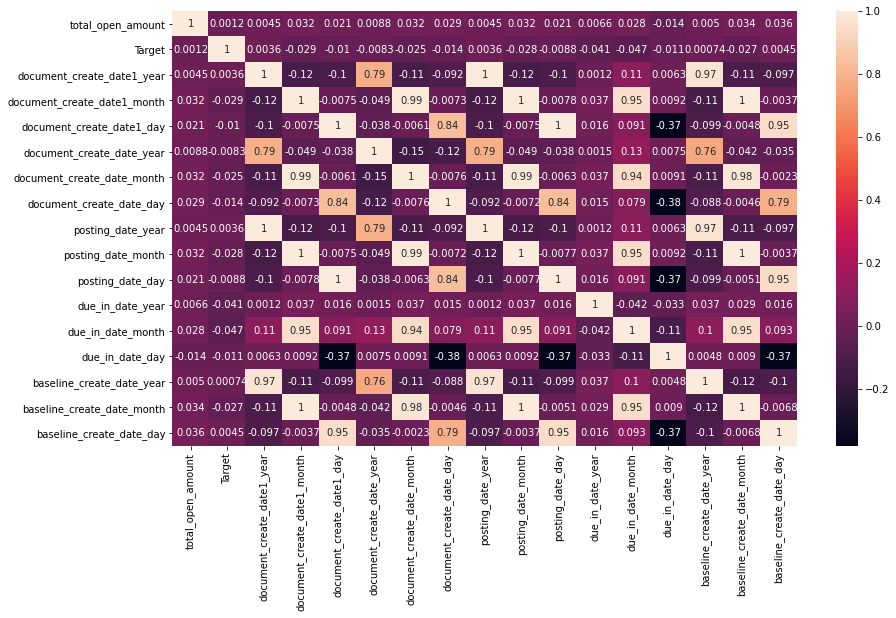

In [168]:
#visualisation
corr=train.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr,annot=True)

In [169]:
def handling_correlation(df,threshold=0.8):
    # creating set to hold the correlated features
    corr_features = set()
    # create the correlation matrix (default to pearson)
    corr_matrix = df.corr()
    #code for selecting all correleated features
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

In [170]:
Filter_method = handling_correlation(x_train.copy(),0.20)
Filter_method

['document_create_date1_Qtr',
 'due_in_date_day',
 'due_in_date_month',
 'cube_tra',
 'avg_payment_terms',
 'curr_code',
 'normalised_day_of_week',
 'avg_cust_delay']

In [171]:
#train_features contain all the columns of x_train except output_label

#x_train_new=x_train.drop(labels=['total_open_amount'],axis=1,inplace=False)
#train=train.drop(['total_open_amount'],axis=1)

In [172]:
#handling_correlation(x_train_new.copy(),0.85)

In [173]:
def FFS(X,y):
    from mlxtend.feature_selection import SequentialFeatureSelector as SFS
    from sklearn.linear_model import LinearRegression
    # Sequential Forward Selection(sfs)
    sfs = SFS(LinearRegression(),
              k_features=8,
              forward=True,
              scoring = 'r2',
              cv = 5)
    """
    LinearRegression() is an estimator for the entire process. Similarly, it can be any classification based algorithm.

    k_features indicates the number of features to be selected. It can be any random value, but the optimal value can be found by analyzing and visualizing the scores for different numbers of features.

    we give forward=True if we want forward feature selection

    The scoring argument specifies the evaluation criterion to be used. For regression problems, there is only r2 score in default implementation. Similarly for classification, it can be accuracy, precision, recall, f1-score, etc.

    cv argument is for k-fold cross-validation. 

    """
    sfs.fit(X, y)#doing the FFS
    
    return sfs.k_feature_names_

In [174]:
FFS(x_train,y_train)

('document_create_date1_year',
 'due_in_date_year',
 'due_in_date_month',
 'due_in_date_day',
 'document_create_date1_Qtr',
 'avg_payment_terms',
 'curr_code',
 'avg_cust_delay')

In [175]:
#FORWARD SELECTION WITH RANDOM FOREST IS THE BEST ONE TO CONSIDER
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
#I am going to use RandomForestRegressor algoritham as an estimator. Your can select other regression alogritham as well.
from sklearn.ensemble import RandomForestRegressor
#k_features=10 (It will get top 10 features best suited for prediction)
#forward=True (Forward feature selection model)
#verbose=2 (It will show details output as shown below.)
#cv=5 (Kfold cross valiation: it will split the training set in 5 set and 4 will be using for training the model and 1 will using as validation)
#n_jobs=-1 (Number of cores it will use for execution.-1 means it will use all the cores of CPU for execution.)
#scoring='r2'(R-squared is a statistical measure of how close the data are to the fitted regression line)
model=sfs(RandomForestRegressor(),k_features=10,forward=True,verbose=2,cv=5,n_jobs=-1,scoring='r2')
model.fit(x_train,y_train)

In [176]:
model.k_feature_names_

In [177]:
#taking the intersection of the filter method and wrapper method forward selection to have the best features
x_train_new = x_train[['due_in_date_day','document_create_date1_Qtr','curr_code','avg_payment_terms','avg_cust_delay','due_in_date_month']] 
x_train_new    

,due_in_date_day,document_create_date1_Qtr,curr_code,avg_payment_terms,avg_cust_delay,due_in_date_month
14572,14,4,1,-1.827749,-2.207046,1
28273,14,4,1,-1.827749,-2.207046,1
19221,14,4,1,-1.827749,-2.207046,1
10645,14,4,1,-1.827749,-2.207046,1
5259,14,4,1,-1.827749,-2.207046,1
...,...,...,...,...,...,...
4639,14,4,1,1.358679,0.200000,12
35834,31,4,1,-4.486532,-7.071885,12
21851,14,4,1,-1.827749,1.084577,12
9855,19,4,1,0.245566,1.546296,12


In [178]:
#taking all the required datas in other train test set(Here the features are selected from FFS RANDOM FOREST REGRESSOR)
x_train1 = x_train[['weekend_day','buisness_value','avg_payment_terms','curr_code','avg_cust_delay','normalised_day_of_week']]
x_val11  = val1_x[['weekend_day','buisness_value','avg_payment_terms','curr_code','avg_cust_delay','normalised_day_of_week']]
x_val22 = val2_x[['weekend_day','buisness_value','avg_payment_terms','curr_code','avg_cust_delay','normalised_day_of_week']]
x_test1 = x_test[['weekend_day','buisness_value','avg_payment_terms','curr_code','avg_cust_delay','normalised_day_of_week']]

In [179]:
#Here the features are selected through FFS LINEAR REGRESSION
y_val1 = val1_x['Target']
x_val1 = val1_x[['due_in_date_day','document_create_date1_Qtr','curr_code','avg_payment_terms','avg_cust_delay','due_in_date_month']]
y_val2 = val2_x['Target']
x_val2 = val2_x[['due_in_date_day','document_create_date1_Qtr','curr_code','avg_payment_terms','avg_cust_delay','due_in_date_month']]

In [180]:
x_val1.isnull().sum()

due_in_date_day              0
document_create_date1_Qtr    0
curr_code                    0
avg_payment_terms            0
avg_cust_delay               0
due_in_date_month            0
dtype: int64

In [181]:
# Filtering out the warnings after Cell Execution
import warnings
warnings.filterwarnings('ignore')

In [182]:
!pip install xgboost --user
# Importing in Common Data Science Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Modeling & Accuracy Metrics
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [183]:
#now the main modelling starts
# Defining Lists to Store in the Results and Names of Algorithms
MSE_Score = []
R2_Score = []
Algorithm = []

In [184]:
# Fitting Simple Linear Regression to the Training Set
Algorithm.append('Linear Regression')
clf = LinearRegression()
clf.fit(x_train1, y_train)

# Predicting the Test Set Results
predicted = clf.predict(x_val11)

In [185]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val1, predicted))
R2_Score.append(r2_score(y_val1, predicted))

In [186]:
#score
MSE_Score

[38.28613422315886]

In [187]:
R2_Score

[0.5105291219337669]

In [188]:
# Fitting Simple Linear Regression to the Training Set
Algorithm.append('Linear Regression')
clf = LinearRegression()
clf.fit(x_train1, y_train)

# Predicting the Test Set Results
predicted = clf.predict(x_val22)

In [189]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val2, predicted))
R2_Score.append(r2_score(y_val2, predicted))

In [190]:
#score
MSE_Score

[38.28613422315886, 68.69233105088345]

In [191]:
R2_Score

[0.5105291219337669, 0.40804671925376734]

In [192]:
# Fitting SVR to the Training Set
Algorithm.append('Support Vector Regression')
clf = SVR()
clf.fit(x_train1, y_train)

# Predicting the Test Set Results
predicted = clf.predict(x_val11)

In [193]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val1, predicted))
R2_Score.append(r2_score(y_val1, predicted))

In [194]:
MSE_Score

[38.28613422315886, 68.69233105088345, 39.98394386865759]

In [195]:
Algorithm.append('Support Vector Regression')
clf = SVR()
clf.fit(x_train1, y_train)

# Predicting the Test Set Results
predicted = clf.predict(x_val22)

In [196]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val2, predicted))
R2_Score.append(r2_score(y_val2, predicted))

In [197]:
MSE_Score

[38.28613422315886, 68.69233105088345, 39.98394386865759, 70.947585272996]

In [198]:
R2_Score

[0.5105291219337669,
 0.40804671925376734,
 0.48882339491709415,
 0.3886121606171211]

In [199]:
# Fitting Random Forest Regressor Tree to the Training Set
Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor()
clf.fit(x_train1, y_train)

# Predicting the Test Set Results
predicted = clf.predict(x_val11)

In [200]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val1, predicted))
R2_Score.append(r2_score(y_val1, predicted))

In [201]:
MSE_Score

[38.28613422315886,
 68.69233105088345,
 39.98394386865759,
 70.947585272996,
 41.77573502564185]

In [202]:
R2_Score

[0.5105291219337669,
 0.40804671925376734,
 0.48882339491709415,
 0.3886121606171211,
 0.4659161568604012]

In [203]:
# Fitting Random Forest Regressor Tree to the Training Set
Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor()
clf.fit(x_train1, y_train)

# Predicting the Test Set Results
predicted = clf.predict(x_val22)

In [204]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val2, predicted))
R2_Score.append(r2_score(y_val2, predicted))

In [205]:
MSE_Score

[38.28613422315886,
 68.69233105088345,
 39.98394386865759,
 70.947585272996,
 41.77573502564185,
 58.59568752397507]

In [206]:
R2_Score

[0.5105291219337669,
 0.40804671925376734,
 0.48882339491709415,
 0.3886121606171211,
 0.4659161568604012,
 0.4950541212278159]

In [207]:
predicted

array([-11.56944697,   0.29031266,  -2.89198899, ...,   9.01489016,
         0.68321284,   2.97290909])

In [208]:
# Fitting Decision Tree to the Training Set
Algorithm.append('Decision Tree Regressor')
clf = DecisionTreeRegressor()
clf.fit(x_train1, y_train)

# Predicting the Test Set Results
predicted = clf.predict(x_val11)

In [209]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val1, predicted))
R2_Score.append(r2_score(y_val1, predicted))

In [210]:
MSE_Score

[38.28613422315886,
 68.69233105088345,
 39.98394386865759,
 70.947585272996,
 41.77573502564185,
 58.59568752397507,
 45.07466192590588]

In [211]:
# Fitting Decision Tree to the Training Set
Algorithm.append('Decision Tree Regressor')
clf = DecisionTreeRegressor()
clf.fit(x_train1, y_train)

# Predicting the Test Set Results
predicted = clf.predict(x_val22)

In [212]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val2, predicted))
R2_Score.append(r2_score(y_val2, predicted))

In [213]:
MSE_Score

[38.28613422315886,
 68.69233105088345,
 39.98394386865759,
 70.947585272996,
 41.77573502564185,
 58.59568752397507,
 45.07466192590588,
 61.02881924628702]

In [214]:
R2_Score

[0.5105291219337669,
 0.40804671925376734,
 0.48882339491709415,
 0.3886121606171211,
 0.4659161568604012,
 0.4950541212278159,
 0.423740871229923,
 0.4740867106963055]

In [215]:
# Fitting XGBoost Regressor to the Training Set
Algorithm.append('XGB Regressor')
clf = xgb.XGBRegressor()
clf.fit(x_train1, y_train)

# Predicting the Test Set Results
predicted = clf.predict(x_val11)

In [216]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val1, predicted))
R2_Score.append(r2_score(y_val1, predicted))

In [217]:
MSE_Score

[38.28613422315886,
 68.69233105088345,
 39.98394386865759,
 70.947585272996,
 41.77573502564185,
 58.59568752397507,
 45.07466192590588,
 61.02881924628702,
 40.5713182731772]

In [218]:
R2_Score

[0.5105291219337669,
 0.40804671925376734,
 0.48882339491709415,
 0.3886121606171211,
 0.4659161568604012,
 0.4950541212278159,
 0.423740871229923,
 0.4740867106963055,
 0.48131407930277603]

In [219]:
# Fitting XGBoost Regressor to the Training Set
Algorithm.append('XGB Regressor')
clf = xgb.XGBRegressor()
clf.fit(x_train1, y_train)

# Predicting the Test Set Results
predicted = clf.predict(x_val22)

In [220]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val1, predicted))
R2_Score.append(r2_score(y_val1, predicted))

In [221]:
MSE_Score

[38.28613422315886,
 68.69233105088345,
 39.98394386865759,
 70.947585272996,
 41.77573502564185,
 58.59568752397507,
 45.07466192590588,
 61.02881924628702,
 40.5713182731772,
 152.45934853189513]

In [222]:
R2_Score

[0.5105291219337669,
 0.40804671925376734,
 0.48882339491709415,
 0.3886121606171211,
 0.4659161568604012,
 0.4950541212278159,
 0.423740871229923,
 0.4740867106963055,
 0.48131407930277603,
 -0.9491236895411888]

In [223]:
# Just Combining the Lists into a DataFrame for a Better Visualisation
Comparison1 = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])

In [224]:
# Score Card
Comparison1

,Algorithm,MSE_Score,R2_Score
0,Linear Regression,38.286134,0.510529
1,Linear Regression,68.692331,0.408047
2,Support Vector Regression,39.983944,0.488823
3,Support Vector Regression,70.947585,0.388612
4,Random Forest Regressor,41.775735,0.465916
5,Random Forest Regressor,58.595688,0.495054
6,Decision Tree Regressor,45.074662,0.423741
7,Decision Tree Regressor,61.028819,0.474087
8,XGB Regressor,40.571318,0.481314
9,XGB Regressor,152.459349,-0.949124


In [225]:
x_test1

,weekend_day,buisness_value,avg_payment_terms,curr_code,avg_cust_delay,normalised_day_of_week
46802,0,1,6.834734,1,7.389908,4
47753,0,1,-1.827749,1,-2.207046,4
46988,0,1,-1.827749,1,-2.207046,4
46623,0,1,-1.827749,1,-2.207046,4
49802,0,1,-1.827749,1,-2.207046,4
...,...,...,...,...,...,...
46139,0,1,2.772277,1,3.897603,2
46454,0,1,-1.827749,1,-2.055402,2
46693,0,1,1.358679,1,1.464286,3
48773,0,1,1.358679,1,-7.250000,5


In [226]:
#choosing linear regression as the algorithm for our model
predicted1 = []
# Fitting Simple Linear Regression to the Training Set
Algorithm.append('Linear Regression')
clf = LinearRegression()
clf.fit(x_train1, y_train)

# Predicting the Test Set Results
predicted1 = clf.predict(x_test1)

In [227]:
predicted1

array([ 8.14864345, -2.26695099, -2.26695099, ...,  1.56753877,
       -4.7363211 ,  6.51312842])

In [228]:
#test = Test_data['due_in_date']

In [238]:
pred_df = pd.DataFrame(data=predicted1,columns=['Delay'])
pred_df 

,Delay
0,8.148643
1,-2.266951
2,-2.266951
3,-2.266951
4,-2.266951
...,...
3897,3.812679
3898,-2.358169
3899,1.567539
3900,-4.736321


In [247]:
#temp_pred = pd.concat([temp_pred,test],axis=1)
#temp_pred

In [231]:
#temp_pred['Delay'] = round(temp_pred['Delay'])

In [232]:
#temp = temp_pred['Delay'].apply(np.ceil).apply(lambda x: pd.Timedelta(x,unit='D'))

In [233]:
#temp_pred['payment_date'] = temp_pred['due_in_date'] + temp

In [248]:
#temp_pred.drop(['payment_date'],axis=1)

In [242]:
import math

In [243]:
pred_df['Delay'] = round(pred_df['Delay'])

In [245]:
#binning delay into buckets
bins = [-math.inf,15,30,45,60,math.inf]
labels = ["0-15 days","16-30 days","31-45 days","46-60 days"," > 60"]
pred_df['aging bucket'] = pd.cut(pred_df['Delay'],bins=bins,labels=labels)
pred_df

,Delay,aging bucket
0,8.0,0-15 days
1,-2.0,0-15 days
2,-2.0,0-15 days
3,-2.0,0-15 days
4,-2.0,0-15 days
...,...,...
3897,4.0,0-15 days
3898,-2.0,0-15 days
3899,2.0,0-15 days
3900,-5.0,0-15 days


In [246]:
pred_df['aging bucket'].value_counts()

0-15 days     3876
46-60 days      18
31-45 days       4
16-30 days       4
 > 60            0
Name: aging bucket, dtype: int64

In [254]:
temp_pred2 = pred_df
test.reset_index()
temp_pred2 = pd.concat([temp_pred2,test],axis=1)
temp_pred2

,Delay,aging bucket,due_in_date
0,8.0,0-15 days,NaT
1,-2.0,0-15 days,NaT
2,-2.0,0-15 days,NaT
3,-2.0,0-15 days,NaT
4,-2.0,0-15 days,NaT
...,...,...,...
49995,NaN,NaN,2020-05-08
49996,NaN,NaN,2020-03-28
49997,NaN,NaN,2020-04-01
49998,NaN,NaN,2020-05-18
